In [1]:
# !pip install pycountry-convert

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
import pycountry
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency

import warnings
import matplotlib.pyplot as plt

# 경고 무시 설정
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# read_csv

In [3]:
df_distribution_centers = pd.read_csv('./distribution_centers.csv')
df_events = pd.read_csv('./events.csv')
df_inventory_items = pd.read_csv('./inventory_items.csv')
df_order_items = pd.read_csv('./order_items.csv')
df_orders = pd.read_csv('./orders.csv')
df_products = pd.read_csv('./products.csv')
df_users = pd.read_csv('./users.csv')

## columns info

In [4]:
dataframes = [
    ('df_distribution_centers', df_distribution_centers),
    ('df_events', df_events),
    ('df_inventory_items', df_inventory_items),
    ('df_order_items', df_order_items),
    ('df_orders', df_orders),
    ('df_products', df_products),
    ('df_users', df_users)
]

for name, df in dataframes:
    print(f"\nInfo for {name}:\n{df.info()}\n")
    
pd.options.mode.chained_assignment = None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10 non-null     int64  
 1   name       10 non-null     object 
 2   latitude   10 non-null     float64
 3   longitude  10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes

Info for df_distribution_centers:
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431963 entries, 0 to 2431962
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   user_id          float64
 2   sequence_number  int64  
 3   session_id       object 
 4   created_at       object 
 5   ip_address       object 
 6   city             object 
 7   state            object 
 8   postal_code      object 
 9   browser          object 
 10  traffic_source   object 
 11  uri              object 
 12  event_type   

## df_distribution_centers

In [5]:
df_distribution_centers

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.0500,-118.2500
4,5,New Orleans LA,29.9500,-90.0667
5,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
6,7,Philadelphia PA,39.9500,-75.1667
7,8,Mobile AL,30.6944,-88.0431
8,9,Charleston SC,32.7833,-79.9333
9,10,Savannah GA,32.0167,-81.1167


In [6]:
print(df_distribution_centers)

   id                                         name  latitude  longitude
0   1                                   Memphis TN   35.1174   -89.9711
1   2                                   Chicago IL   41.8369   -87.6847
2   3                                   Houston TX   29.7604   -95.3698
3   4                               Los Angeles CA   34.0500  -118.2500
4   5                               New Orleans LA   29.9500   -90.0667
5   6  Port Authority of New York/New Jersey NY/NJ   40.6340   -73.7834
6   7                              Philadelphia PA   39.9500   -75.1667
7   8                                    Mobile AL   30.6944   -88.0431
8   9                                Charleston SC   32.7833   -79.9333
9  10                                  Savannah GA   32.0167   -81.1167


## df_events

In [7]:
df_events

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2198523,NaN,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
1,1773216,NaN,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel
2,2380515,NaN,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel
3,2250597,NaN,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel
4,1834446,NaN,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431958,822590,62906.0,5,12ae51e7-76b3-4560-9335-3ea762eae60e,2022-04-07 01:55:02+00:00,52.92.60.25,St Helens,England,WA9,Firefox,Adwords,/purchase,purchase
2431959,43178,3333.0,5,e472549e-273e-402e-ae5f-38ece25699c2,2023-09-26 10:25:28+00:00,97.78.106.249,Orrell,England,WN5,IE,Email,/purchase,purchase
2431960,553230,42386.0,10,6a7ba027-2af2-46a3-ae05-294a264840cf,2023-07-31 15:11:10+00:00,147.252.137.75,Orrell,England,WN5,Chrome,Facebook,/purchase,purchase
2431961,1015190,77546.0,5,29e5960c-214b-456e-8c38-fe6eb8ff1ec8,2024-01-02 14:26:38+00:00,112.209.120.82,Wolverhampton,England,WV6,Chrome,Adwords,/purchase,purchase


In [8]:
column_names = df_events.columns

for column in column_names:
    value_counts = df_events[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for id:
id
2198523    1
1291745    1
1508305    1
367872     1
2029633    1
          ..
328408     1
416642     1
1581833    1
2095987    1
844526     1
Name: count, Length: 2431963, dtype: int64

Value counts for user_id:
user_id
NaN        1125671
32996.0        164
80546.0        161
19415.0        156
98947.0        156
            ...   
9496.0           5
15063.0          5
63030.0          5
3966.0           5
44883.0          5
Name: count, Length: 80045, dtype: int64

Value counts for sequence_number:
sequence_number
1     681759
2     557043
3     432146
4     181759
5     181759
6      94047
7      94047
9      44313
10     44313
8      44313
12     25488
11     25488
13     25488
Name: count, dtype: int64

Value counts for session_id:
session_id
b174d8d5-a07f-44c1-a1c2-226f495b4cf4    13
b8872abf-7c4a-4afc-ac54-c61ae7f7249a    13
ee9acceb-18ca-4588-a25f-c980f5f3622f    13
6ae3a11d-7927-4877-8a62-21693e6a68be    13
c61b8349-fb9d-4e1b-9dc2-638409fcad20    13
   

In [9]:
df_events[["sequence_number","uri"]]

,sequence_number,uri
0,3,/cancel
1,3,/cancel
2,3,/cancel
3,3,/cancel
4,3,/cancel
...,...,...
2431958,5,/purchase
2431959,5,/purchase
2431960,10,/purchase
2431961,5,/purchase


## df_inventory_items

In [10]:
df_inventory_items

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
...,...,...,...,...,...,...,...,...,...,...,...,...
490700,311018,25590,2021-12-07 12:47:00+00:00,NaN,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490701,451084,25590,2023-10-10 11:57:57+00:00,2023-11-27 11:28:57+00:00,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490702,451085,25590,2020-11-20 05:55:00+00:00,NaN,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490703,486057,25590,2023-02-26 22:35:12+00:00,2023-04-23 01:24:12+00:00,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3


In [11]:
df_inventory_items['product_department'].value_counts()

product_department
Women    245625
Men      245080
Name: count, dtype: int64

In [12]:
column_names = df_inventory_items.columns

for column in column_names:
    value_counts = df_inventory_items[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for id:
id
67971     1
388182    1
456578    1
456577    1
456576    1
         ..
187378    1
187377    1
158701    1
158700    1
486058    1
Name: count, Length: 490705, dtype: int64

Value counts for product_id:
product_id
18795    58
27625    53
21086    52
17045    51
25209    51
         ..
17362     2
15406     2
3071      2
18147     2
6513      2
Name: count, Length: 29046, dtype: int64

Value counts for created_at:
created_at
2020-09-30 15:54:00+00:00    6
2023-06-01 02:11:00+00:00    5
2022-12-22 03:33:00+00:00    5
2021-11-13 07:35:00+00:00    5
2020-05-22 04:47:00+00:00    4
                            ..
2021-04-26 04:13:27+00:00    1
2021-06-07 13:55:00+00:00    1
2022-10-24 18:27:35+00:00    1
2023-05-17 03:00:00+00:00    1
2022-09-12 13:52:00+00:00    1
Name: count, Length: 463339, dtype: int64

Value counts for sold_at:
sold_at
NaN                          308946
2023-12-11 08:13:51+00:00         2
2023-12-05 03:10:15+00:00         2
2023-11-25 09:04:15+0

In [13]:
df_inventory_items['created_at'] = pd.to_datetime(df_inventory_items['created_at'], errors='coerce')

In [14]:
df_inventory_items['created_at']

0        2022-07-02 07:09:20+00:00
1        2023-12-20 03:28:00+00:00
2        2023-06-04 02:53:00+00:00
3        2021-10-16 22:58:52+00:00
4        2021-08-07 16:33:00+00:00
                    ...           
490700   2021-12-07 12:47:00+00:00
490701   2023-10-10 11:57:57+00:00
490702   2020-11-20 05:55:00+00:00
490703   2023-02-26 22:35:12+00:00
490704   2022-09-12 13:52:00+00:00
Name: created_at, Length: 490705, dtype: datetime64[ns, UTC]

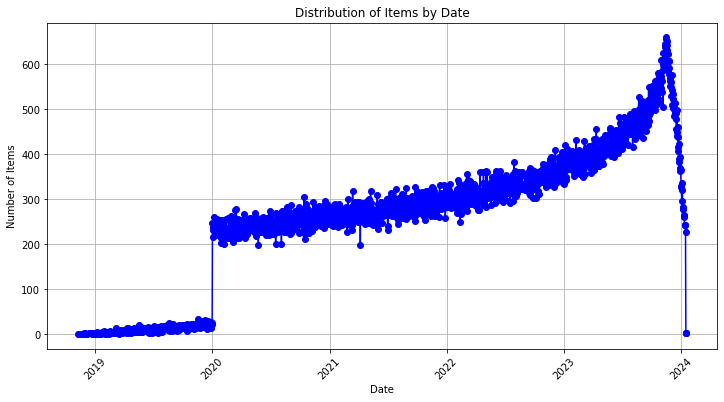

In [15]:
import matplotlib.pyplot as plt

# 'created_at' 칼럼에서 날짜만 추출
df_inventory_items['date'] = df_inventory_items['created_at'].dt.date

# 날짜별 데이터 개수 계산
date_counts = df_inventory_items['date'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))
date_counts.plot(marker='o', linestyle='-', color='b')
plt.title('Distribution of Items by Date')
plt.xlabel('Date')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


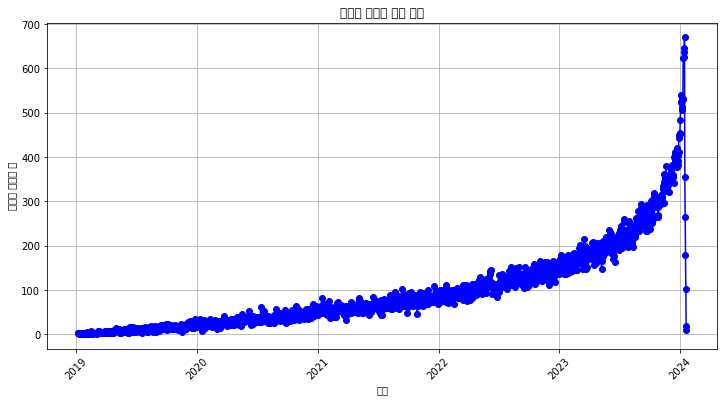

In [16]:
# 'sold_at' 열을 'coerce' 에러 처리 모드로 datetime으로 변환한 새로운 데이터프레임 생성
df_modified = df_inventory_items.copy()
df_modified['sold_at'] = pd.to_datetime(df_modified['sold_at'], errors='coerce')

# 결측값이 있는 행 삭제한 새로운 데이터프레임 생성
df_modified = df_modified.dropna(subset=['sold_at'])

# 'sold_at' 열에서 날짜만 추출
df_modified['date_sold'] = df_modified['sold_at'].dt.date

# 날짜별 아이템 판매 데이터 개수 계산
date_sold_counts = df_modified['date_sold'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))
date_sold_counts.plot(marker='o', linestyle='-', color='b')
plt.title('날짜별 아이템 판매 분포')
plt.xlabel('날짜')
plt.ylabel('판매된 아이템 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## df_order_items

In [17]:
df_order_items

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02
...,...,...,...,...,...,...,...,...,...,...,...
181754,9674,6679,5325,24447,26095,Returned,2020-12-23 00:05:01+00:00,2020-12-25 22:54:00+00:00,2020-12-28 07:08:00+00:00,2020-12-30 22:43:00+00:00,999.00
181755,7801,5416,4283,24447,21078,Shipped,2022-01-12 23:51:07+00:00,2022-01-10 03:42:00+00:00,NaN,NaN,999.00
181756,62986,43364,34691,23546,169937,Shipped,2023-02-26 00:38:43+00:00,2023-02-25 06:53:00+00:00,NaN,NaN,999.00
181757,106577,73418,58623,24447,287560,Shipped,2023-11-12 02:41:02+00:00,2023-11-14 20:44:00+00:00,NaN,NaN,999.00


In [18]:
column_names = df_order_items.columns

for column in column_names:
    value_counts = df_order_items[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for id:
id
152013    1
160536    1
26117     1
27247     1
35738     1
         ..
123933    1
124128    1
125909    1
127832    1
143759    1
Name: count, Length: 181759, dtype: int64

Value counts for order_id:
order_id
551       4
70304     4
106023    4
106407    4
93518     4
         ..
21230     1
21000     1
20626     1
20230     1
98984     1
Name: count, Length: 125226, dtype: int64

Value counts for user_id:
user_id
32996    14
80546    13
80952    13
46712    12
34249    12
         ..
2623      1
5221      1
11082     1
13303     1
5325      1
Name: count, Length: 80044, dtype: int64

Value counts for product_id:
product_id
18795    21
17045    19
21842    19
25209    18
27192    18
         ..
5367      1
23736     1
26444     1
16733     1
8094      1
Name: count, Length: 29046, dtype: int64

Value counts for inventory_item_id:
inventory_item_id
410368    1
433356    1
70444     1
73461     1
96419     1
         ..
334537    1
335065    1
339879    1
345072

## df_orders

In [19]:
df_orders

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3
1,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaN,NaN,NaN,1
2,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaN,NaN,NaN,1
3,89,65,Cancelled,F,2020-08-13 09:58:00+00:00,NaN,NaN,NaN,1
4,102,76,Cancelled,F,2023-01-17 08:17:00+00:00,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...
125221,125196,99972,Shipped,M,2022-06-25 11:56:00+00:00,NaN,2022-06-28 08:24:00+00:00,NaN,1
125222,125199,99975,Shipped,M,2022-07-20 02:19:00+00:00,NaN,2022-07-22 11:08:00+00:00,NaN,4
125223,125208,99983,Shipped,M,2022-03-14 15:06:00+00:00,NaN,2022-03-17 05:15:00+00:00,NaN,1
125224,125210,99983,Shipped,M,2023-03-01 15:06:00+00:00,NaN,2023-03-02 10:50:00+00:00,NaN,2


In [20]:
column_names = df_orders.columns

for column in column_names:
    value_counts = df_orders[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for order_id:
order_id
8         1
90804     1
90795     1
90793     1
90790     1
         ..
83118     1
83109     1
83101     1
83033     1
125224    1
Name: count, Length: 125226, dtype: int64

Value counts for user_id:
user_id
32645    4
76789    4
76821    4
76834    4
76836    4
        ..
29213    1
29229    1
29231    1
29255    1
99999    1
Name: count, Length: 80044, dtype: int64

Value counts for status:
status
Shipped       37577
Complete      31354
Processing    25156
Cancelled     18609
Returned      12530
Name: count, dtype: int64

Value counts for gender:
gender
F    62701
M    62525
Name: count, dtype: int64

Value counts for created_at:
created_at
2024-01-17 06:56:00+00:00           6
2024-01-15 11:28:00+00:00           5
2023-12-23 06:12:00+00:00           5
2024-01-17 18:01:46.667763+00:00    4
2024-01-17 17:55:21.096187+00:00    4
                                   ..
2022-04-10 07:09:00+00:00           1
2023-02-11 11:50:00+00:00           1
2022-06-

## df_products

In [21]:
df_products

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1
...,...,...,...,...,...,...,...,...,...
29115,5676,12.42338,Pants & Capris,WHAT GOES AROUND COMES AROUND Women's Colette ...,What Goes Around Comes Around,24.17,Women,3A01FC0853EBEBA94FDE4D1CC6FB842A,10
29116,6538,13.67500,Shorts,WHAT GOES AROUND COMES AROUND Women's Mimi Shorts,What Goes Around Comes Around,25.00,Women,741A0099C9AC04C7BFC822CAF7C7459F,10
29117,6712,12.40000,Shorts,WHAT GOES AROUND COMES AROUND Women's Fifi Short,What Goes Around Comes Around,25.00,Women,5726DAF2C9EE0F955ECA58291C26D2F3,10
29118,6821,13.47500,Shorts,WHAT GOES AROUND COMES AROUND Women's Ferguson...,What Goes Around Comes Around,25.00,Women,BA0A4D6ECEA3E9E126DD3B6D77291C97,10


In [22]:
column_names = df_products.columns

for column in column_names:
    value_counts = df_products[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for id:
id
13842    1
19905    1
5575     1
5434     1
5422     1
        ..
8214     1
8212     1
8205     1
8196     1
7809     1
Name: count, Length: 29120, dtype: int64

Value counts for cost:
cost
13.550000     10
10.750000      9
11.450000      8
12.050000      8
12.775000      7
              ..
52.080000      1
105.966001     1
106.676187     1
55.924000      1
101.841000     1
Name: count, Length: 26375, dtype: int64

Value counts for category:
category
Intimates                        2363
Jeans                            1999
Tops & Tees                      1868
Fashion Hoodies & Sweatshirts    1866
Swim                             1798
Sleep & Lounge                   1771
Shorts                           1765
Sweaters                         1737
Accessories                      1559
Active                           1432
Outerwear & Coats                1420
Underwear                        1088
Pants                            1041
Dresses                   

In [23]:
# 'category' 열의 고유한 값 개수를 확인합니다.
unique_categories = df_products['category'].nunique()
print("고유한 카테고리의 개수:", unique_categories)

고유한 카테고리의 개수: 26


In [24]:
# 'category' 열의 고유한 값 개수를 확인합니다.
unique_categories = df_products['name'].nunique()
print("고유한 카테고리의 개수:", unique_categories)

고유한 카테고리의 개수: 27309


## df_users

In [25]:
df_users

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2022-07-19 13:51:00+00:00
1,6578,Elizabeth,Martinez,elizabethmartinez@example.com,34,F,Acre,1705 Nielsen Land,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2023-11-08 18:49:00+00:00
2,36280,Christopher,Mendoza,christophermendoza@example.net,13,M,Acre,125 Turner Isle Apt. 264,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Email,2019-08-24 06:10:00+00:00
3,60193,Jimmy,Conner,jimmyconner@example.com,64,M,Acre,0966 Jose Branch Apt. 008,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2020-02-15 11:26:00+00:00
4,64231,Natasha,Wilson,natashawilson@example.net,25,F,Acre,20798 Phillip Trail Apt. 392,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2020-03-13 06:45:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,93247,Crystal,Williams,crystalwilliams@example.com,36,F,Île-de-France,984 Brady Branch,77120,Beautheil-Saints,France,48.789740,3.095796,Search,2021-02-13 01:36:00+00:00
99996,59110,Daniel,Griffin,danielgriffin@example.org,12,M,Île-de-France,89560 Phillips Lakes Apt. 604,77160,Chenoise-Cucharmoy,France,48.589783,3.243343,Organic,2022-09-01 12:01:00+00:00
99997,57045,Olivia,Wiley,oliviawiley@example.org,53,F,Île-de-France,749 Ronald Forge,77320,Choisy-en-Brie,France,48.763993,3.319993,Search,2021-06-19 11:39:00+00:00
99998,73312,Emily,Bird,emilybird@example.org,16,F,Île-de-France,78117 Anderson Oval,77320,Choisy-en-Brie,France,48.763993,3.319993,Search,2023-08-08 16:24:00+00:00


In [26]:
column_names = df_users.columns

for column in column_names:
    value_counts = df_users[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for id:
id
457      1
49561    1
1729     1
866      1
38443    1
        ..
55509    1
53432    1
52692    1
52389    1
77764    1
Name: count, Length: 100000, dtype: int64

Value counts for first_name:
first_name
Michael     2319
James       1475
David       1440
Jennifer    1420
John        1382
            ... 
Tami           9
Darin          9
Gilbert        8
Gene           6
Terrence       5
Name: count, Length: 690, dtype: int64

Value counts for last_name:
last_name
Smith       2194
Johnson     1628
Williams    1378
Brown       1266
Jones       1204
            ... 
Shea          22
Murillo       22
Mayo          21
Hinton        21
Mcknight      20
Name: count, Length: 1000, dtype: int64

Value counts for email:
email
michaelsmith@example.org          23
johnsmith@example.net             18
michaeldavis@example.org          18
williamsmith@example.org          16
williamsmith@example.net          15
                                  ..
tashablake@example.org     

In [27]:
filtered_df = df_users[df_users['email'] == 'michaeldavis@example.org']
filtered_df

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
8699,47063,Michael,Davis,michaeldavis@example.org,44,M,Beijing,2213 Denise Plain Apt. 270,100024,Huaibei,China,39.918773,116.575721,Facebook,2024-01-01 00:17:00+00:00
12077,55034,Michael,Davis,michaeldavis@example.org,67,M,California,29178 Smith Lodge Suite 715,90016,Los Angeles,United States,34.028709,-118.354248,Search,2021-06-08 02:22:00+00:00
15298,14187,Michael,Davis,michaeldavis@example.org,55,M,Ceará,246 Williams Forks,60810-670,Fortaleza,Brasil,-3.824307,-38.521437,Search,2022-04-22 13:24:00+00:00
18059,59503,Michael,Davis,michaeldavis@example.org,28,M,Comunidad Valenciana,5133 Becker Creek Apt. 570,3184,Torrevieja,Spain,38.020815,-0.689472,Search,2023-09-10 02:34:00+00:00
20589,69240,Michael,Davis,michaeldavis@example.org,62,M,England,7229 Finley Port,CT14,Deal,United Kingdom,51.220903,1.355952,Search,2020-02-29 11:00:00+00:00
28012,28124,Michael,Davis,michaeldavis@example.org,60,M,Fujian,2743 Ellen Squares,350323,Changchun,China,25.734532,119.413464,Search,2022-03-10 11:15:00+00:00
30281,85779,Michael,Davis,michaeldavis@example.org,33,M,Guangdong,68365 Brandon Stravenue Suite 276,525121,Wenzhou,China,21.669359,110.654633,Search,2019-12-06 05:17:00+00:00
38528,24769,Michael,Davis,michaeldavis@example.org,57,M,Gyeonggi-do,887 Hess Roads Apt. 520,467-860,Icheon City,South Korea,37.273158,127.506922,Organic,2023-09-20 09:19:00+00:00
39316,85611,Michael,Davis,michaeldavis@example.org,56,M,Hauts-de-France,1475 Sandoval Cliffs Apt. 160,59110,La Madeleine,France,50.654324,3.069975,Search,2023-06-22 18:00:00+00:00
71654,10447,Michael,Davis,michaeldavis@example.org,37,M,Pernambuco,67776 Sandra Wall,55580-000,Sirinhaém,Brasil,-8.569359,-35.173508,Organic,2019-05-18 04:31:00+00:00


In [28]:
df_distribution_centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10 non-null     int64  
 1   name       10 non-null     object 
 2   latitude   10 non-null     float64
 3   longitude  10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [29]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  int64  
 1   first_name      100000 non-null  object 
 2   last_name       100000 non-null  object 
 3   email           100000 non-null  object 
 4   age             100000 non-null  int64  
 5   gender          100000 non-null  object 
 6   state           100000 non-null  object 
 7   street_address  100000 non-null  object 
 8   postal_code     100000 non-null  object 
 9   city            99042 non-null   object 
 10  country         100000 non-null  object 
 11  latitude        100000 non-null  float64
 12  longitude       100000 non-null  float64
 13  traffic_source  100000 non-null  object 
 14  created_at      100000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 11.4+ MB


In [30]:
df_users.isna().sum()

id                  0
first_name          0
last_name           0
email               0
age                 0
gender              0
state               0
street_address      0
postal_code         0
city              958
country             0
latitude            0
longitude           0
traffic_source      0
created_at          0
dtype: int64

# User Behavior Analysis

In [31]:
df_events

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2198523,NaN,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
1,1773216,NaN,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel
2,2380515,NaN,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel
3,2250597,NaN,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel
4,1834446,NaN,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431958,822590,62906.0,5,12ae51e7-76b3-4560-9335-3ea762eae60e,2022-04-07 01:55:02+00:00,52.92.60.25,St Helens,England,WA9,Firefox,Adwords,/purchase,purchase
2431959,43178,3333.0,5,e472549e-273e-402e-ae5f-38ece25699c2,2023-09-26 10:25:28+00:00,97.78.106.249,Orrell,England,WN5,IE,Email,/purchase,purchase
2431960,553230,42386.0,10,6a7ba027-2af2-46a3-ae05-294a264840cf,2023-07-31 15:11:10+00:00,147.252.137.75,Orrell,England,WN5,Chrome,Facebook,/purchase,purchase
2431961,1015190,77546.0,5,29e5960c-214b-456e-8c38-fe6eb8ff1ec8,2024-01-02 14:26:38+00:00,112.209.120.82,Wolverhampton,England,WV6,Chrome,Adwords,/purchase,purchase


## 기본적인 데이터 탐색(EDA)

### 데이터 탐색

#### head, tail

In [206]:
df_events[df_events['session_id']=='a928c260-5475-499f-98d8-9835b2901b87']

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type,department,category,brand
1297,579640,44403.0,12,a928c260-5475-499f-98d8-9835b2901b87,2023-04-05 17:56:51+00:00,97.3.152.95,Suzhou,Beijing,100011,Other,YouTube,/cart,cart,None,None,None
273694,579637,44403.0,9,a928c260-5475-499f-98d8-9835b2901b87,2023-04-05 17:54:11+00:00,97.3.152.95,Suzhou,Beijing,100011,Other,YouTube,/cart,cart,None,None,None
279640,579638,44403.0,10,a928c260-5475-499f-98d8-9835b2901b87,2023-04-05 17:54:21+00:00,97.3.152.95,Suzhou,Beijing,100011,Other,YouTube,/department/men/category/pants/brand/hottopic,department,men,pants,hottopic
304525,579632,44403.0,4,a928c260-5475-499f-98d8-9835b2901b87,2023-04-05 17:45:15+00:00,97.3.152.95,Suzhou,Beijing,100011,Other,YouTube,/department/men/category/pants/brand/hottopic,department,men,pants,hottopic
336629,579630,44403.0,2,a928c260-5475-499f-98d8-9835b2901b87,2023-04-05 17:42:35+00:00,97.3.152.95,Suzhou,Beijing,100011,Other,YouTube,/product/22300,product,22300,None,None
696722,579634,44403.0,6,a928c260-5475-499f-98d8-9835b2901b87,2023-04-05 17:49:01+00:00,97.3.152.95,Suzhou,Beijing,100011,Other,YouTube,/cart,cart,None,None,None
983205,579636,44403.0,8,a928c260-5475-499f-98d8-9835b2901b87,2023-04-05 17:52:05+00:00,97.3.152.95,Suzhou,Beijing,100011,Other,YouTube,/product/22300,product,22300,None,None
1026070,579629,44403.0,1,a928c260-5475-499f-98d8-9835b2901b87,2023-04-05 17:40:28+00:00,97.3.152.95,Suzhou,Beijing,100011,Other,YouTube,/department/men/category/pants/brand/hottopic,department,men,pants,hottopic
1909450,579641,44403.0,13,a928c260-5475-499f-98d8-9835b2901b87,2023-04-08 17:56:52+00:00,97.3.152.95,Suzhou,Beijing,100011,Other,YouTube,/purchase,purchase,None,None,None
1962340,579631,44403.0,3,a928c260-5475-499f-98d8-9835b2901b87,2023-04-05 17:42:42+00:00,97.3.152.95,Suzhou,Beijing,100011,Other,YouTube,/cart,cart,None,None,None


In [205]:
df_events[df_events['sequence_number']==12]

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type,department,category,brand
1297,579640,44403.0,12,a928c260-5475-499f-98d8-9835b2901b87,2023-04-05 17:56:51+00:00,97.3.152.95,Suzhou,Beijing,100011,Other,YouTube,/cart,cart,None,None,None
1313,32848,2537.0,12,93af6a52-b4ee-476d-945c-619e70b2383c,2023-02-20 13:50:08+00:00,201.118.3.122,New York,New York,10002,Chrome,Adwords,/cart,cart,None,None,None
1318,1208388,92473.0,12,d763d83a-eb9b-4770-b6ff-6ac62c43dfed,2023-10-19 00:21:38+00:00,214.234.209.9,Huaibei,Beijing,100024,Chrome,Adwords,/cart,cart,None,None,None
1331,1005130,76810.0,12,be22e655-4723-4091-bd27-36a52540b016,2023-05-30 17:28:59+00:00,10.120.160.214,Nanchang,Beijing,100041,Firefox,Adwords,/cart,cart,None,None,None
1370,58888,4524.0,12,51a28fb0-d65f-4d78-a5ff-5361447e5c52,2020-02-12 23:58:57+00:00,220.194.83.233,Shanghai,Beijing,100101,IE,Email,/cart,cart,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414513,412509,31600.0,12,44003a37-55a1-4cab-90b7-b02e56332531,2023-12-16 01:09:41+00:00,86.247.226.70,Rotherham,England,S61,Chrome,Email,/cart,cart,None,None,None
2414514,904871,69141.0,12,33e65b09-4e31-49e5-b173-b60084cb64be,2023-05-17 00:00:05+00:00,111.121.158.155,Swinton,England,S64,Firefox,Email,/cart,cart,None,None,None
2414525,285482,21865.0,12,709756b4-5f6c-4261-8b10-2ab74938592d,2024-01-07 01:50:12+00:00,200.48.122.152,Slough,England,SL2,Chrome,Email,/cart,cart,None,None,None
2414545,936223,71498.0,12,2612048a-12e4-4f32-9d4f-13eb7bf226ab,2022-01-27 00:52:47+00:00,190.172.107.196,London,England,SW19,Safari,Facebook,/cart,cart,None,None,None


In [32]:
df_events.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2198523,NaN,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
1,1773216,NaN,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel
2,2380515,NaN,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel
3,2250597,NaN,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel
4,1834446,NaN,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel


In [33]:
df_events.tail()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
2431958,822590,62906.0,5,12ae51e7-76b3-4560-9335-3ea762eae60e,2022-04-07 01:55:02+00:00,52.92.60.25,St Helens,England,WA9,Firefox,Adwords,/purchase,purchase
2431959,43178,3333.0,5,e472549e-273e-402e-ae5f-38ece25699c2,2023-09-26 10:25:28+00:00,97.78.106.249,Orrell,England,WN5,IE,Email,/purchase,purchase
2431960,553230,42386.0,10,6a7ba027-2af2-46a3-ae05-294a264840cf,2023-07-31 15:11:10+00:00,147.252.137.75,Orrell,England,WN5,Chrome,Facebook,/purchase,purchase
2431961,1015190,77546.0,5,29e5960c-214b-456e-8c38-fe6eb8ff1ec8,2024-01-02 14:26:38+00:00,112.209.120.82,Wolverhampton,England,WV6,Chrome,Adwords,/purchase,purchase
2431962,844526,64551.0,13,9f633088-d2a8-4db2-8a5e-ebd946abce26,2022-09-15 09:55:32+00:00,190.227.140.196,York,England,YO10,Firefox,Email,/purchase,purchase


#### info

In [34]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431963 entries, 0 to 2431962
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   user_id          float64
 2   sequence_number  int64  
 3   session_id       object 
 4   created_at       object 
 5   ip_address       object 
 6   city             object 
 7   state            object 
 8   postal_code      object 
 9   browser          object 
 10  traffic_source   object 
 11  uri              object 
 12  event_type       object 
dtypes: float64(1), int64(2), object(10)
memory usage: 241.2+ MB


#### 요약통계

In [35]:
df_events.describe()

,id,user_id,sequence_number
count,2.431963e+06,1.306292e+06,2.431963e+06
mean,1.215982e+06,4.996636e+04,3.316146e+00
std,7.020474e+05,2.881711e+04,2.676365e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,6.079915e+05,2.500500e+04,1.000000e+00
50%,1.215982e+06,4.992700e+04,2.000000e+00
75%,1.823972e+06,7.483900e+04,4.000000e+00
max,2.431963e+06,1.000000e+05,1.300000e+01


#### nunique

In [36]:
df_events.nunique()

id                 2431963
user_id              80044
sequence_number         13
session_id          681759
created_at         2143390
ip_address          681683
city                  8775
state                  231
postal_code          17324
browser                  5
traffic_source           5
uri                  35530
event_type               6
dtype: int64

#### null

In [37]:
df_events.isnull().sum()

id                       0
user_id            1125671
sequence_number          0
session_id               0
created_at               0
ip_address               0
city                 23080
state                    0
postal_code              0
browser                  0
traffic_source           0
uri                      0
event_type               0
dtype: int64

##### 널 값 비율 계산

In [38]:
# user_id 널 값 비율 계산
null_percentage = df_events['user_id'].isnull().mean() * 100
print("user_id 열의 널 값 비율: {:.2f}%".format(null_percentage))

user_id 열의 널 값 비율: 46.29%


In [39]:
# city 널 값 비율 계산
null_percentage = df_events['city'].isnull().mean() * 100
print("city 열의 널 값 비율: {:.2f}%".format(null_percentage))

city 열의 널 값 비율: 0.95%


##### user_id 널값 - 비회원 근거
- sequence_number
- 시퀀스 넘버가 3까지밖에 없다. => 클릭 수가 작다. => 비회원 가능성이 높다

In [40]:
# 유저 아이디가 널 값인 행 선택
null_user_ids = df_events[df_events['user_id'].isnull()]

# 널 값인 사용자의 시퀀스 넘버 출력
print(null_user_ids['sequence_number'].value_counts())

sequence_number
1    500000
2    375284
3    250387
Name: count, dtype: int64


#### 시퀀스 숫자가 패턴이 보인다
- 이러한 패턴은 일반적으로 일련의 순차적인 작업이나 이벤트를 나타내는 것으로 보입니다. 예를 들어, 순차 번호가 1에서 5까지는 일련의 초기 작업을 나타낼 수 있고, 이어지는 6과 7은 다음 단계의 작업을 나타내며, 그 이후의 8에서 10은 또 다른 작업 단계를 나타내는 것으로 해석될 수 있습니다. 마지막으로 11에서 13은 또 다른 단계나 종료를 나타낼 수 있습니다.
- 이러한 패턴은 데이터의 특성에 따라 다르며, 실제 의미를 파악하려면 해당 데이터의 컨텍스트를 고려해야 합니다. 예를 들어, 시퀀스 넘버가 웹사이트의 페이지 뷰를 나타낸다면, 1에서 5까지는 메인 페이지 뷰일 수 있고, 6과 7은 상세 페이지 뷰를 나타내며, 8에서 10은 결제 페이지를 나타낼 수 있습니다. 따라서 이러한 패턴을 이해하기 위해서는 해당 데이터가 어떤 종류의 작업이나 이벤트를 나타내는지에 대한 이해가 필요합니다.

In [41]:
# 유저 아이디가 널 값이 아닌 행 선택
non_null_user_ids = df_events[df_events['user_id'].notnull()]

# 널 값이 아닌 사용자들의 시퀀스 넘버 출력
print(non_null_user_ids['sequence_number'].value_counts().sort_index())

sequence_number
1     181759
2     181759
3     181759
4     181759
5     181759
6      94047
7      94047
8      44313
9      44313
10     44313
11     25488
12     25488
13     25488
Name: count, dtype: int64


### id

In [42]:
df_events['id']

0          2198523
1          1773216
2          2380515
3          2250597
4          1834446
            ...   
2431958     822590
2431959      43178
2431960     553230
2431961    1015190
2431962     844526
Name: id, Length: 2431963, dtype: int64

In [43]:
df_events['id'].value_counts().sort_index()

id
1          1
2          1
3          1
4          1
5          1
          ..
2431959    1
2431960    1
2431961    1
2431962    1
2431963    1
Name: count, Length: 2431963, dtype: int64

### user_id
- 널값(전체 46.29%)
- 시퀀스 넘버와 엮어서 보니, 비회원일 가능성이 있어 보임

In [44]:
df_events['user_id'].value_counts(dropna=False)

user_id
NaN        1125671
32996.0        164
80546.0        161
19415.0        156
98947.0        156
            ...   
9496.0           5
15063.0          5
63030.0          5
3966.0           5
44883.0          5
Name: count, Length: 80045, dtype: int64

In [45]:
df_events['user_id'].value_counts(dropna=False).sort_index()

user_id
1.0              30
2.0               5
3.0              29
4.0               5
5.0              30
             ...   
99996.0          28
99998.0          15
99999.0          14
100000.0         10
NaN         1125671
Name: count, Length: 80045, dtype: int64

### sequence_number
- 널값인 user_id를 제외하고 시퀀스 넘버를 보면, 1~5, 6~7, 8~10, 11~13 개수가 같다. 일정한 패턴이 보임.

In [46]:
df_events['sequence_number'].value_counts(dropna=False)

sequence_number
1     681759
2     557043
3     432146
4     181759
5     181759
6      94047
7      94047
9      44313
10     44313
8      44313
12     25488
11     25488
13     25488
Name: count, dtype: int64

In [47]:
# 유저 아이디가 널 값이 아닌 행 선택
non_null_user_ids = df_events[df_events['user_id'].notnull()]

# 널 값이 아닌 사용자들의 시퀀스 넘버 출력
print(non_null_user_ids['sequence_number'].value_counts().sort_index())

sequence_number
1     181759
2     181759
3     181759
4     181759
5     181759
6      94047
7      94047
8      44313
9      44313
10     44313
11     25488
12     25488
13     25488
Name: count, dtype: int64


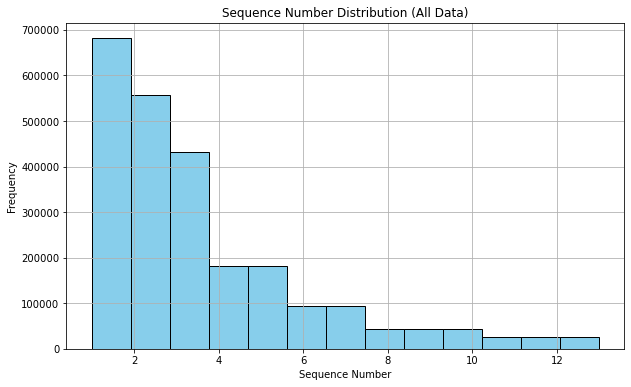

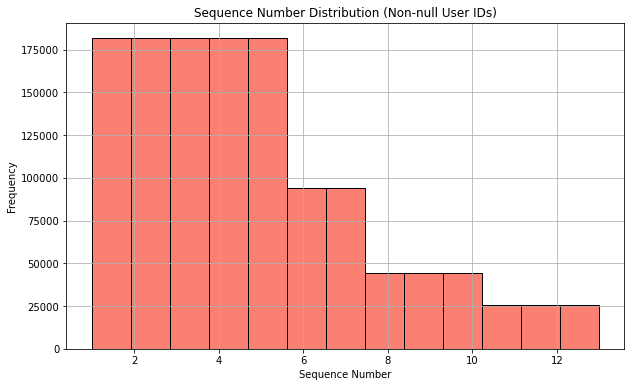

In [48]:
# 시퀀스 넘버 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(df_events['sequence_number'], bins=13, color='skyblue', edgecolor='black')
plt.title('Sequence Number Distribution (All Data)')
plt.xlabel('Sequence Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(non_null_user_ids['sequence_number'], bins=13, color='salmon', edgecolor='black')
plt.title('Sequence Number Distribution (Non-null User IDs)')
plt.xlabel('Sequence Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### session_id
- 세션아이디의 밸류카운트가 1,2,3,5,7,13 이렇게 분포했다는 것은 각 세션아이디별 시퀀스넘버가 1,2,3,5,7,13개 있다는 것과 같다.

In [49]:
df_events['session_id']

0          83889ed2-2adc-4b9a-af5d-154f6998e778
1          7a3fc3f2-e84f-44fe-8876-eff76741f7a3
2          13d9b2fb-eee1-43fd-965c-267b38dd7125
3          96f1d44e-9621-463c-954c-d8deb7fffe7f
4          d09dce10-a7cb-47d3-a9af-44975566fa03
                           ...                 
2431958    12ae51e7-76b3-4560-9335-3ea762eae60e
2431959    e472549e-273e-402e-ae5f-38ece25699c2
2431960    6a7ba027-2af2-46a3-ae05-294a264840cf
2431961    29e5960c-214b-456e-8c38-fe6eb8ff1ec8
2431962    9f633088-d2a8-4db2-8a5e-ebd946abce26
Name: session_id, Length: 2431963, dtype: object

In [50]:
df_events['session_id'].value_counts()

session_id
b174d8d5-a07f-44c1-a1c2-226f495b4cf4    13
b8872abf-7c4a-4afc-ac54-c61ae7f7249a    13
ee9acceb-18ca-4588-a25f-c980f5f3622f    13
6ae3a11d-7927-4877-8a62-21693e6a68be    13
c61b8349-fb9d-4e1b-9dc2-638409fcad20    13
                                        ..
b5eb4236-cb65-461a-8c25-6e10c7d85a66     1
d532f9d5-3274-4639-8b90-7c2667aaa063     1
e12b78a2-2617-4d2c-9920-a38c33ced713     1
0e79f9dd-e2c3-4458-adb1-0d3cde17d010     1
bffdad64-b636-4f66-a574-0df70f87d790     1
Name: count, Length: 681759, dtype: int64

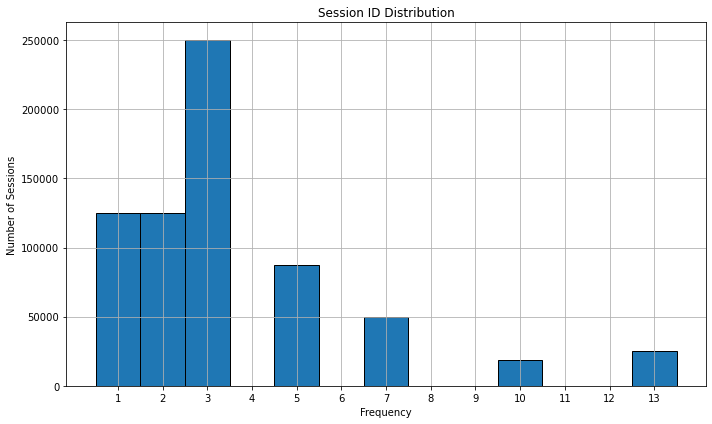

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(df_events['session_id'].value_counts(), bins=range(1, df_events['session_id'].value_counts().max()+2), edgecolor='black', align='left')
plt.title('Session ID Distribution')
plt.xlabel('Frequency')
plt.ylabel('Number of Sessions')
plt.grid(True)
plt.xticks(range(1, df_events['session_id'].value_counts().max()+1))
plt.tight_layout() 
plt.show()

### created_at
- 이벤트 생성 개수를 년/월/일 별로 나눠서 시각화 해본 결과, 년/월/일 모두 시간이 지남에 따라 카운트가 증가하는 것을 볼 수 있다.

In [52]:
df_events['created_at']

0          2021-06-17 17:30:00+00:00
1          2020-08-07 08:41:00+00:00
2          2021-02-15 18:48:00+00:00
3          2022-03-30 10:56:00+00:00
4          2019-09-05 01:18:00+00:00
                     ...            
2431958    2022-04-07 01:55:02+00:00
2431959    2023-09-26 10:25:28+00:00
2431960    2023-07-31 15:11:10+00:00
2431961    2024-01-02 14:26:38+00:00
2431962    2022-09-15 09:55:32+00:00
Name: created_at, Length: 2431963, dtype: object

In [53]:
df_events['created_at'].value_counts()

created_at
2020-10-21 16:07:00+00:00    8
2021-10-27 03:05:00+00:00    8
2023-06-21 01:28:00+00:00    8
2019-03-08 16:46:00+00:00    7
2020-05-12 06:36:00+00:00    7
                            ..
2022-08-12 13:30:13+00:00    1
2023-04-23 05:36:00+00:00    1
2021-03-15 03:37:05+00:00    1
2019-11-25 03:57:00+00:00    1
2022-09-15 09:55:32+00:00    1
Name: count, Length: 2143390, dtype: int64

In [54]:
df_events['created_at'].value_counts().sort_index()

created_at
2019-01-02 00:05:00+00:00           1
2019-01-02 00:24:00+00:00           1
2019-01-02 00:25:00+00:00           1
2019-01-02 00:26:00+00:00           1
2019-01-02 00:27:00+00:00           1
                                   ..
2024-01-21 17:10:33.200976+00:00    1
2024-01-21 17:28:11.434458+00:00    1
2024-01-21 17:46:48.782754+00:00    1
2024-01-21 17:57:14.434458+00:00    1
2024-01-21 18:02:23.533893+00:00    1
Name: count, Length: 2143390, dtype: int64

In [56]:
# 'created_at' 컬럼을 datetime 타입으로 변환합니다.
df_events['created_at'] = pd.to_datetime(df_events['created_at'], format='ISO8601')
df_events['created_at']

0         2021-06-17 17:30:00+00:00
1         2020-08-07 08:41:00+00:00
2         2021-02-15 18:48:00+00:00
3         2022-03-30 10:56:00+00:00
4         2019-09-05 01:18:00+00:00
                     ...           
2431958   2022-04-07 01:55:02+00:00
2431959   2023-09-26 10:25:28+00:00
2431960   2023-07-31 15:11:10+00:00
2431961   2024-01-02 14:26:38+00:00
2431962   2022-09-15 09:55:32+00:00
Name: created_at, Length: 2431963, dtype: datetime64[ns, UTC]

In [57]:
# 연도별로 데이터를 집계합니다.
yearly_counts = df_events['created_at'].groupby(df_events['created_at'].dt.to_period('Y')).count()
yearly_counts

created_at
2019    247846
2020    316033
2021    399188
2022    526737
2023    837211
2024    104948
Freq: A-DEC, Name: created_at, dtype: int64

In [58]:
# 월별로 데이터를 집계합니다. 이때 각 연도의 월을 구분하기 위해 'Y-M' 포맷을 사용합니다.
monthly_counts = df_events['created_at'].groupby(df_events['created_at'].dt.to_period('M')).count()
monthly_counts

created_at
2019-01     18059
2019-02     17594
2019-03     19801
2019-04     19846
2019-05     20663
            ...  
2023-09     75061
2023-10     83393
2023-11     89113
2023-12    106248
2024-01    104948
Freq: M, Name: created_at, Length: 61, dtype: int64

In [59]:
# 일별로 데이터를 집계합니다.
daily_counts = df_events['created_at'].groupby(df_events['created_at'].dt.to_period('D')).count()
daily_counts

created_at
2019-01-02     559
2019-01-03     570
2019-01-04     606
2019-01-05     658
2019-01-06     582
              ... 
2024-01-17    5962
2024-01-18     577
2024-01-19     366
2024-01-20     161
2024-01-21      71
Freq: D, Name: created_at, Length: 1846, dtype: int64

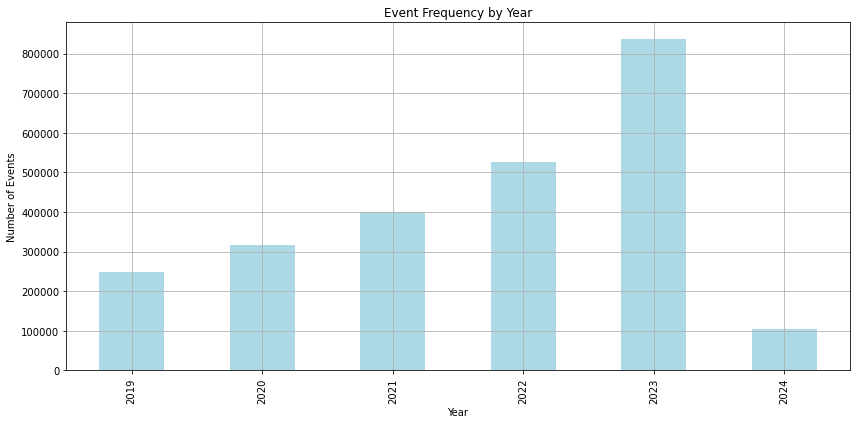

In [60]:
# 연도별로 데이터를 집계합니다.
yearly_counts = df_events['created_at'].groupby(df_events['created_at'].dt.to_period('Y')).count()

# 연도별 그래프를 생성합니다.
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar', color='lightblue')
plt.title('Event Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)
plt.tight_layout()
plt.show()

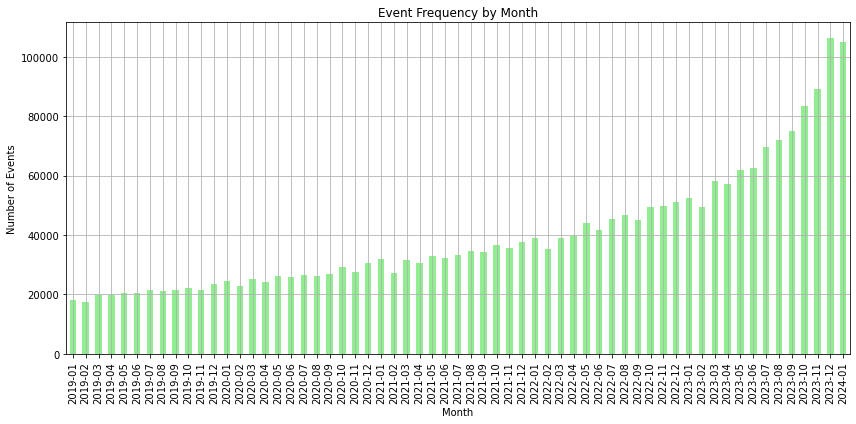

In [61]:
# 월별로 데이터를 집계합니다. 이때 각 연도의 월을 구분하기 위해 'Y-M' 포맷을 사용합니다.
monthly_counts = df_events['created_at'].groupby(df_events['created_at'].dt.to_period('M')).count()

# 월별 그래프를 생성합니다.
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='lightgreen')
plt.title('Event Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.grid(True)
plt.tight_layout()
plt.show()

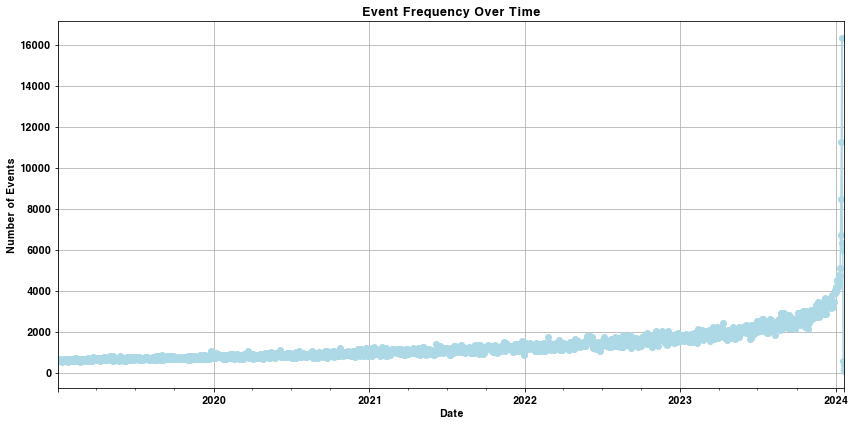

In [187]:
# 일별로 데이터를 집계합니다.
daily_counts = df_events['created_at'].groupby(df_events['created_at'].dt.to_period('D')).count()

# 시계열 그래프를 생성합니다.
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', color='lightblue', marker='o')
plt.title('Event Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.grid(True)
plt.tight_layout()
plt.show()

### ip_address

In [188]:
df_events['ip_address'].value_counts()

ip_address
196.46.153.171     17
144.63.70.49       16
144.18.158.227     16
186.132.236.160    14
112.82.169.212     14
                   ..
142.114.242.51      1
221.200.70.111      1
24.199.95.209       1
87.124.126.57       1
215.184.4.247       1
Name: count, Length: 681683, dtype: int64

### city

In [189]:
df_events['city']

0              São Paulo
1           Santa Isabel
2              Mairiporã
3                Cajamar
4              São Paulo
               ...      
2431958        St Helens
2431959           Orrell
2431960           Orrell
2431961    Wolverhampton
2431962             York
Name: city, Length: 2431963, dtype: object

In [190]:
df_events['city'].value_counts()

city
Shanghai       60561
Beijing        53095
Seoul          35860
Shenzhen       32723
Dongguan       23024
               ...  
Ningi              1
Nanga Brook        1
Blairmount         1
Nagambie           1
Modave             1
Name: count, Length: 8775, dtype: int64

### state

In [191]:
df_events['state']

0          São Paulo
1          São Paulo
2          São Paulo
3          São Paulo
4          São Paulo
             ...    
2431958      England
2431959      England
2431960      England
2431961      England
2431962      England
Name: state, Length: 2431963, dtype: object

In [192]:
df_events['state'].value_counts()

state
Guangdong     129796
England        99365
California     89515
Shanghai       59276
Texas          58816
               ...  
Shiga             44
Shimane           44
Nara              28
Yamanashi         13
Mie                9
Name: count, Length: 231, dtype: int64

In [193]:
# 주(state)별로 도시(city)의 고유값 개수를 계산
state_city = df_events.groupby('state')['city'].unique().reset_index()
state_city

,state,city
0,Acre,"[Rio Branco, Sena Madureira, nan, Tarauacá]"
1,Aichi,"[Anjo city, Long time, Daily enterprise, Tokai..."
2,Akita,"[Loda City, Lagastation]"
3,Alabama,"[Theodore, Pelham, Decatur, Huntsville, Fairho..."
4,Alagoas,"[Rio Largo, São Miguel dos Campos, Teotônio Vi..."
...,...,...
226,Yamanashi,[Kofu City]
227,Yunnan,"[Daqing, Shanghai, Qingdao, Shenyang, Hengshui..."
228,Zachodniopomorskie,"[Schwedt/Oder, Mierzyn]"
229,Zhejiang,"[Zhongshan, Harbin, Liaoyang, Qingdao, Jiujian..."


In [194]:
# 주(state)별로 도시(city)의 고유값 개수를 계산
state_city_counts = df_events.groupby('state')['city'].nunique().reset_index()
state_city_counts

,state,city
0,Acre,3
1,Aichi,19
2,Akita,2
3,Alabama,29
4,Alagoas,15
...,...,...
226,Yamanashi,1
227,Yunnan,18
228,Zachodniopomorskie,2
229,Zhejiang,67


In [195]:
# 주(state)별로 고유한 IP 주소 개수 계산
state_ip_counts = df_events.groupby('state')['ip_address'].nunique()
state_ip_counts

state
Acre                    283
Aichi                   368
Akita                    17
Alabama                1181
Alagoas                1242
                      ...  
Yamanashi                 5
Yunnan                 2713
Zachodniopomorskie      137
Zhejiang              14568
Île-de-France          8435
Name: ip_address, Length: 231, dtype: int64

In [196]:
state_ip_counts.sort_values(ascending=False)

state
Guangdong     36241
England       27652
California    25288
Shanghai      16735
Texas         16513
              ...  
Kagawa           14
Nagasaki         13
Shimane          11
Yamanashi         5
Mie               4
Name: ip_address, Length: 231, dtype: int64

### postal_code

In [197]:
df_events['postal_code']

0          02675-031
1          07500-000
2          07600-000
3          07750-000
4          09581-680
             ...    
2431958          WA9
2431959          WN5
2431960          WN5
2431961          WV6
2431962         YO10
Name: postal_code, Length: 2431963, dtype: object

In [198]:
df_events['postal_code'].value_counts()

postal_code
02675-031    10147
70297-400     8543
40301-110     6448
40301-155     4111
361006        3100
             ...  
4684             1
2559             1
3724             1
3608             1
7608             1
Name: count, Length: 17324, dtype: int64

### browser

In [199]:
 df_events['browser']

0           Chrome
1           Safari
2               IE
3           Chrome
4           Chrome
            ...   
2431958    Firefox
2431959         IE
2431960     Chrome
2431961     Chrome
2431962    Firefox
Name: browser, Length: 2431963, dtype: object

In [200]:
 df_events['browser'].value_counts()

browser
Chrome     1218687
Firefox     487490
Safari      483743
IE          121551
Other       120492
Name: count, dtype: int64

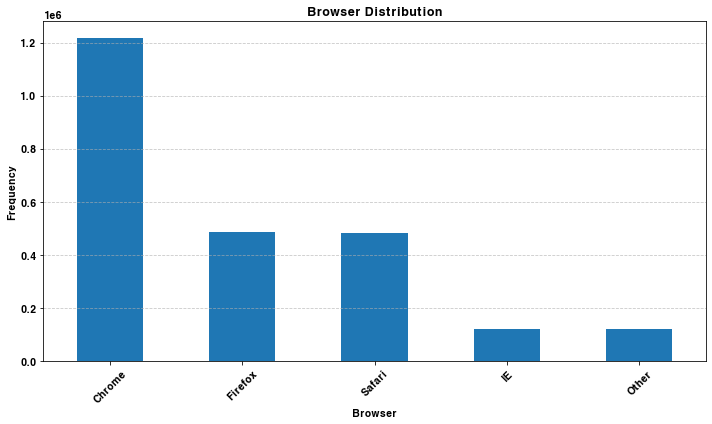

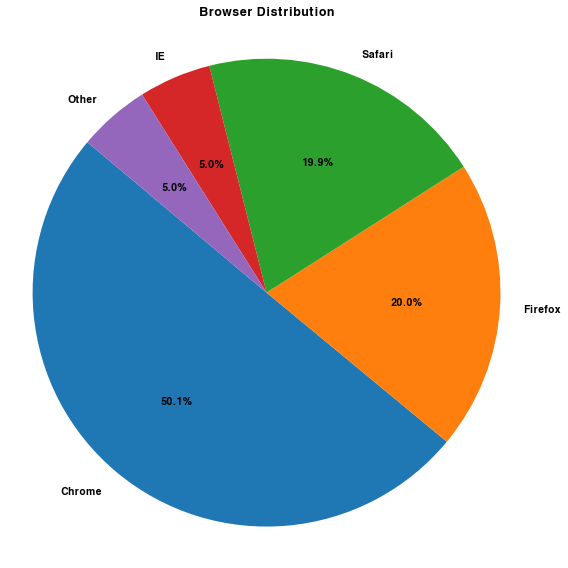

In [201]:
# 브라우저별 빈도수 확인
browser_counts = df_events['browser'].value_counts()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
browser_counts.plot(kind='bar')
plt.title('Browser Distribution')
plt.xlabel('Browser')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 원 그래프 시각화
plt.figure(figsize=(8, 8))
plt.pie(browser_counts, labels=browser_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Browser Distribution')
plt.axis('equal')  # 원 그래프를 원형으로 설정
plt.tight_layout()
plt.show()

### traffic_source
- 트래픽 소스별로 고객을 세분화 -> 다양한 고객 그룹의 특성을 파악 -> 특정 트래픽 소스에서 효과적인 고객 세그먼트를 식별 -> 해당 세그먼트에 맞는 마케팅 전략 구상

In [202]:
df_events['traffic_source'].value_counts()

traffic_source
Email       1091988
Adwords      731144
Facebook     243834
YouTube      242938
Organic      122059
Name: count, dtype: int64

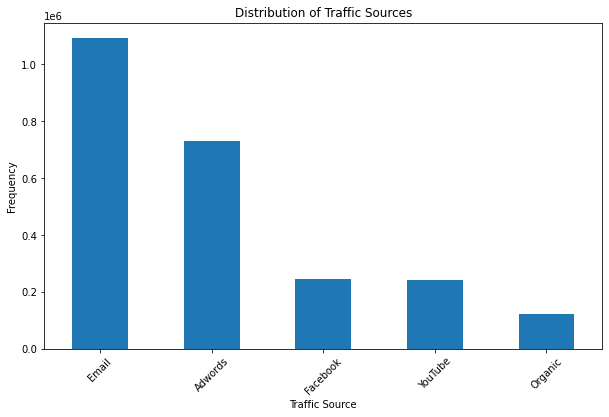

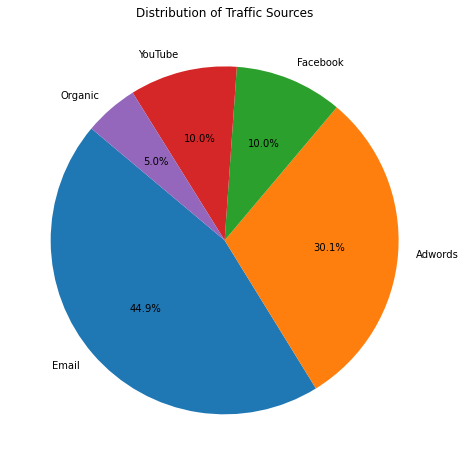

In [63]:
# 각 트래픽 소스의 빈도수 확인
traffic_source_counts = df_events['traffic_source'].value_counts()

# 트래픽 소스별로 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
traffic_source_counts.plot(kind='bar')
plt.title('Distribution of Traffic Sources')
plt.xlabel('Traffic Source')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# 트래픽 소스별로 시각화 (원 그래프)
plt.figure(figsize=(8, 8))
plt.pie(traffic_source_counts, labels=traffic_source_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Traffic Sources')
plt.show()

### uri
- 남여 카테고리, 브랜드 빈도수 파악
- uri의 첫번째 단어들을 모으면 event_type과 동일함

In [64]:
df_events['uri']

0            /cancel
1            /cancel
2            /cancel
3            /cancel
4            /cancel
             ...    
2431958    /purchase
2431959    /purchase
2431960    /purchase
2431961    /purchase
2431962    /purchase
Name: uri, Length: 2431963, dtype: object

In [65]:
df_events['uri'].value_counts()

uri
/cart                                                                  595994
/purchase                                                              181759
/cancel                                                                125568
/home                                                                   87712
/department/women/category/maternity/brand/motherhoodmaternity           3354
                                                                        ...  
/department/women/category/fashionhoodies&sweatshirts/brand/citizen         6
/department/women/category/tops&tees/brand/blackmarket-lowbrow              6
/product/11264                                                              6
/department/men/category/outerwear&coats/brand/toesonthenose                5
/department/women/category/sweaters/brand/hotfromhollywood                  3
Name: count, Length: 35530, dtype: int64

In [66]:
df_events['uri'].value_counts().unique()

array([595994, 181759, 125568,  87712,   3354,   3056,   2587,   2381,
         2350,   2276,   2205,   2164,   2123,   2122,   2005,   1965,
         1954,   1826,   1798,   1726,   1552,   1533,   1509,   1492,
         1449,   1376,   1328,   1325,   1295,   1270,   1253,   1249,
         1245,   1244,   1230,   1214,   1202,   1191,   1160,   1156,
         1150,   1143,   1142,   1137,   1132,   1124,   1109,   1096,
         1044,   1013,   1008,   1000,    999,    997,    990,    977,
          967,    962,    960,    952,    951,    946,    939,    938,
          931,    930,    926,    920,    915,    912,    906,    887,
          886,    866,    864,    833,    832,    827,    803,    779,
          772,    765,    763,    755,    750,    742,    738,    736,
          735,    734,    728,    725,    721,    719,    713,    710,
          705,    701,    698,    694,    693,    691,    686,    684,
          676,    667,    662,    654,    643,    642,    640,    639,
      

In [207]:
# 상위 5개 URI에 대한 빈도수를 딕셔너리로 변환
top_uri_counts = df_events['uri'].value_counts().tail(54).to_dict()
top_uri_counts

{'/department/women/category/blazers&jackets/brand/pencey': 8,
 '/department/women/category/dresses/brand/kirra': 8,
 '/department/women/category/leggings/brand/sanctuary': 8,
 '/department/women/category/plus/brand/costadelmar': 8,
 '/department/women/category/active/brand/sportskatz': 8,
 '/department/women/category/fashionhoodies&sweatshirts/brand/candies': 8,
 '/department/women/category/jeans/brand/vintage': 8,
 '/department/women/category/leggings/brand/purpletopia': 8,
 '/department/women/category/accessories/brand/indigo': 8,
 '/department/women/category/jumpsuits&rompers/brand/evoguesapparel': 8,
 '/department/men/category/tops&tees/brand/charlesriverapparel': 8,
 '/department/women/category/tops&tees/brand/souleater': 8,
 '/department/women/category/outerwear&coats/brand/torrid': 8,
 '/department/women/category/maternity/brand/devon&jones': 8,
 '/department/women/category/jumpsuits&rompers/brand/xoxo': 8,
 '/department/women/category/blazers&jackets/brand/magaschoni': 8,
 '/d

In [67]:
# 상위 5개 URI에 대한 빈도수를 딕셔너리로 변환
top_uri_counts = df_events['uri'].value_counts().head(54).to_dict()
top_uri_counts

{'/cart': 595994,
 '/purchase': 181759,
 '/cancel': 125568,
 '/home': 87712,
 '/department/women/category/maternity/brand/motherhoodmaternity': 3354,
 '/department/women/category/blazers&jackets/brand/allegrak': 3056,
 '/department/men/category/jeans/brand/wrangler': 2587,
 '/department/women/category/dresses/brand/allegrak': 2381,
 '/department/men/category/swim/brand/quiksilver': 2350,
 "/department/women/category/jeans/brand/levi's": 2276,
 '/department/men/category/underwear/brand/calvinklein': 2205,
 '/department/men/category/pants/brand/dockers': 2164,
 '/department/men/category/outerwear&coats/brand/carhartt': 2123,
 '/department/men/category/underwear/brand/hanes': 2122,
 '/department/men/category/pants/brand/allegrak': 2005,
 '/department/women/category/swim/brand/speedo': 1965,
 '/department/men/category/jeans/brand/7forallmankind': 1954,
 '/department/women/category/tops&tees/brand/allegrak': 1826,
 '/department/men/category/swim/brand/speedo': 1798,
 '/department/men/catego

In [68]:
# 성별에 따라 URI 분류
male_uris = [uri for uri in top_uri_counts.keys() if '/department/men' in uri]
female_uris = [uri for uri in top_uri_counts.keys() if '/department/women' in uri]

# 각 성별에 해당하는 URI 빈도수 계산
male_uri_counts = {uri: top_uri_counts[uri] for uri in male_uris}
female_uri_counts = {uri: top_uri_counts[uri] for uri in female_uris}

# 남성 URI 빈도수 출력
print("남성 URI 빈도수:")
for uri, count in sorted(male_uri_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{uri}: {count}")

# 여성 URI 빈도수 출력
print("\n여성 URI 빈도수:")
for uri, count in sorted(female_uri_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{uri}: {count}")

남성 URI 빈도수:
/department/men/category/jeans/brand/wrangler: 2587
/department/men/category/swim/brand/quiksilver: 2350
/department/men/category/underwear/brand/calvinklein: 2205
/department/men/category/pants/brand/dockers: 2164
/department/men/category/outerwear&coats/brand/carhartt: 2123
/department/men/category/underwear/brand/hanes: 2122
/department/men/category/pants/brand/allegrak: 2005
/department/men/category/jeans/brand/7forallmankind: 1954
/department/men/category/swim/brand/speedo: 1798
/department/men/category/jeans/brand/diesel: 1726
/department/men/category/swim/brand/o'neill: 1509
/department/men/category/pants/brand/haggar: 1492
/department/men/category/sleep&lounge/brand/nautica: 1449
/department/men/category/underwear/brand/fruitoftheloom: 1376
/department/men/category/jeans/brand/joe'sjeans: 1270
/department/men/category/active/brand/champion: 1253
/department/men/category/active/brand/adidas: 1249
/department/men/category/sleep&lounge/brand/majesticinternational: 1245

In [69]:
# 각 성별에 대한 카테고리 빈도수 계산
male_category_counts = {}
female_category_counts = {}

for uri, count in male_uri_counts.items():
    category = uri.split('/category/')[1].split('/brand/')[0]
    male_category_counts[category] = male_category_counts.get(category, 0) + count

for uri, count in female_uri_counts.items():
    category = uri.split('/category/')[1].split('/brand/')[0]
    female_category_counts[category] = female_category_counts.get(category, 0) + count

# 남성 카테고리 빈도수 출력
print("\n남성 카테고리 빈도수:")
for category, count in sorted(male_category_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{category}: {count}")

# 여성 카테고리 빈도수 출력
print("\n여성 카테고리 빈도수:")
for category, count in sorted(female_category_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{category}: {count}")


남성 카테고리 빈도수:
jeans: 9793
underwear: 8083
swim: 7698
pants: 5661
sleep&lounge: 3908
outerwear&coats: 3367
active: 2502
accessories: 2136
shorts: 1191
tops&tees: 1142
suits&sportcoats: 1132
sweaters: 1013
fashionhoodies&sweatshirts: 1000

여성 카테고리 빈도수:
intimates: 5802
jeans: 4965
maternity: 3354
blazers&jackets: 3056
dresses: 2381
swim: 1965
tops&tees: 1826
fashionhoodies&sweatshirts: 1552
shorts: 1328
jumpsuits&rompers: 1295
active: 1109


In [70]:
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

font_location = "C:\\Windows\\Fonts\\H2GTRE.TTF"

font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family=font_name)

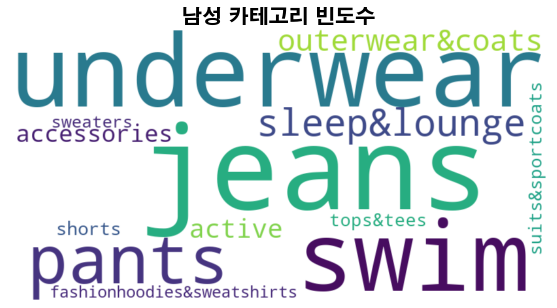

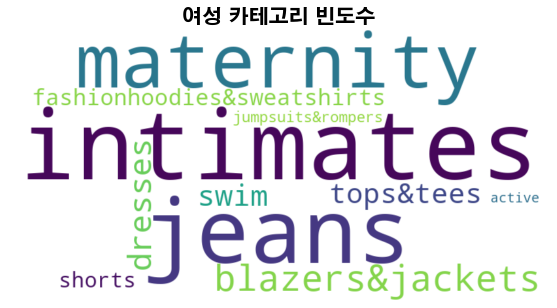

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 워드 클라우드 생성 함수 정의
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# 남성 카테고리 빈도수 워드 클라우드 생성
generate_wordcloud(male_category_counts, "남성 카테고리 빈도수")
print("\n")
# 여성 카테고리 빈도수 워드 클라우드 생성
generate_wordcloud(female_category_counts, "여성 카테고리 빈도수")

In [72]:
# 각 성별에 대한 브랜드 빈도수 계산
male_brand_counts = {}
female_brand_counts = {}

for uri, count in male_uri_counts.items():
    brand = uri.split('/brand/')[1]
    male_brand_counts[brand] = male_brand_counts.get(brand, 0) + count

for uri, count in female_uri_counts.items():
    brand = uri.split('/brand/')[1]
    female_brand_counts[brand] = female_brand_counts.get(brand, 0) + count

# 남성 브랜드 빈도수 출력
print("\n남성 브랜드 빈도수:")
for brand, count in sorted(male_brand_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{brand}: {count}")

# 여성 브랜드 빈도수 출력
print("\n여성 브랜드 빈도수:")
for brand, count in sorted(female_brand_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{brand}: {count}")


남성 브랜드 빈도수:
allegrak: 4137
quiksilver: 3541
carhartt: 3265
diesel: 2876
wrangler: 2587
calvinklein: 2205
dockers: 2164
hanes: 2122
7forallmankind: 1954
speedo: 1798
o'neill: 1509
haggar: 1492
nautica: 1449
fruitoftheloom: 1376
joe'sjeans: 1270
champion: 1253
adidas: 1249
majesticinternational: 1245
columbia: 1244
jockey: 1230
hugoboss: 1214
luckybrand: 1160
ray-ban: 1137
truereligion: 1096
garymajdellsport: 1044
thelittlealpaca'shouse: 1013
oakley: 999
hurley: 997

여성 브랜드 빈도수:
allegrak: 11438
motherhoodmaternity: 3354
levi's: 2276
speedo: 1965
notyourdaughter'sjeans: 1533
bali: 1325
hanes: 1202
7forallmankind: 1156
maidenform: 1143
laura: 1124
champion: 1109
vanityfair: 1008


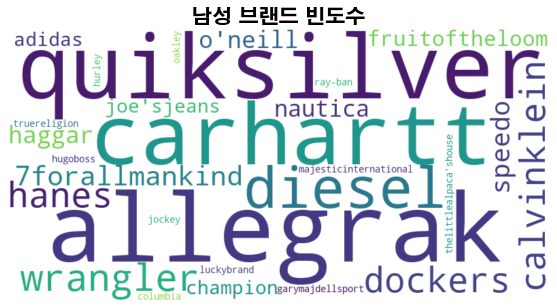

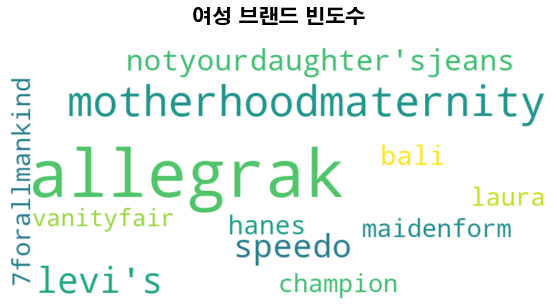

In [73]:
# 워드 클라우드 생성 함수 정의
def generate_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# 크기 조정을 적용하여 빈도수에 비례하여 워드 클라우드 생성
generate_wordcloud(male_brand_counts, "남성 브랜드 빈도수")    
print("\n")
# 크기 조정을 적용하여 빈도수에 비례하여 워드 클라우드 생성
generate_wordcloud(female_brand_counts, "여성 브랜드 빈도수")

1. **남성 카테고리 빈도수**:
   - 남성 제품 카테고리에서는 'jeans', 'underwear', 'swim'이 가장 높은 빈도수를 보입니다. 이는 남성들이 일상적으로 착용하는 의류 카테고리로 해석될 수 있습니다.
   - 'pants', 'sleep&lounge', 'outerwear&coats'도 상당한 빈도로 등장하는 것을 볼 수 있습니다.

2. **여성 카테고리 빈도수**:
   - 여성 제품 카테고리에서는 'intimates', 'jeans', 'maternity'가 높은 빈도를 보이는데, 이는 여성들이 자주 착용하는 의류의 종류임을 나타냅니다.
   - 'blazers&jackets', 'dresses', 'swim'도 상위에 있어 여성들이 자주 착용하는 다양한 의류 유형을 보여줍니다.

3. **남성 브랜드 빈도수**:
   - 남성 브랜드에서는 'allegrak', 'quiksilver', 'carhartt'가 가장 높은 빈도를 보이는 것으로 나타납니다.
   - 이러한 브랜드들은 남성들에게 인기가 있거나 특정 시장 세그먼트를 타겟팅하는 브랜드일 수 있습니다.

4. **여성 브랜드 빈도수**:
   - 여성 브랜드에서는 'allegrak', 'motherhoodmaternity', 'levi's'가 높은 빈도를 보입니다.
   - 이 중 'motherhoodmaternity'는 임신 기간 동안 입을 수 있는 의류를 제공하는 브랜드로 해석될 수 있습니다.

이러한 인사이트를 통해, 각 성별에 맞는 제품과 브랜드에 대한 인기도를 파악할 수 있고, 이를 기반으로 마케팅 전략을 개선하거나 새로운 제품을 개발할 수 있습니다.

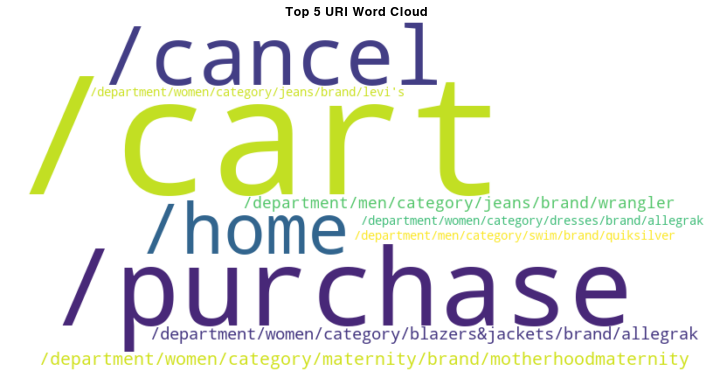

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 상위 5개 URI에 대한 빈도수를 딕셔너리로 변환
top_uri_counts = df_events['uri'].value_counts().head(10).to_dict()

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_uri_counts)

# 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 5 URI Word Cloud')
plt.axis('off')  # 축 제거
plt.tight_layout()
plt.show()

In [75]:
# '/' 문자를 기준으로 uri를 분할하여 첫 번째 단어 추출
uri_first_word = df_events['uri'].str.split('/').str[1]

# 첫 번째 단어의 빈도수 계산
uri_first_word.value_counts()

uri
product       845607
cart          595994
department    595323
purchase      181759
cancel        125568
home           87712
Name: count, dtype: int64

In [103]:
# uri에서 department, category, brand를 추출하는 함수 정의
def extract_info_from_uri(uri):
    parts = uri.split('/')
    department = parts[2] if len(parts) > 2 else None
    category = parts[4] if len(parts) > 4 else None
    brand = parts[6] if len(parts) > 6 else None
    return department, category, brand

# df_events에 department, category, brand 칼럼 추가
df_events['department'], df_events['category'], df_events['brand'] = zip(*df_events['uri'].apply(extract_info_from_uri))

# 결과 확인
print(df_events.head())

        id  user_id  sequence_number                            session_id  \
0  2198523      NaN                3  83889ed2-2adc-4b9a-af5d-154f6998e778   
1  1773216      NaN                3  7a3fc3f2-e84f-44fe-8876-eff76741f7a3   
2  2380515      NaN                3  13d9b2fb-eee1-43fd-965c-267b38dd7125   
3  2250597      NaN                3  96f1d44e-9621-463c-954c-d8deb7fffe7f   
4  1834446      NaN                3  d09dce10-a7cb-47d3-a9af-44975566fa03   

                 created_at       ip_address          city      state  \
0 2021-06-17 17:30:00+00:00    138.143.9.202     São Paulo  São Paulo   
1 2020-08-07 08:41:00+00:00    85.114.141.79  Santa Isabel  São Paulo   
2 2021-02-15 18:48:00+00:00  169.250.255.132     Mairiporã  São Paulo   
3 2022-03-30 10:56:00+00:00   137.25.222.160       Cajamar  São Paulo   
4 2019-09-05 01:18:00+00:00    161.114.4.174     São Paulo  São Paulo   

  postal_code browser traffic_source      uri event_type department category  \
0   02675-03

In [104]:
df_events.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type,department,category,brand
0,2198523,NaN,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel,None,None,None
1,1773216,NaN,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel,None,None,None
2,2380515,NaN,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel,None,None,None
3,2250597,NaN,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel,None,None,None
4,1834446,NaN,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel,None,None,None


In [106]:
df_events['department'].value_counts(dropna=False)

department
None     991033
men      297717
women    297606
20025        65
17821        62
          ...  
7248          9
3193          7
2730          7
11264         6
13668         6
Name: count, Length: 29123, dtype: int64

In [107]:
df_events['category'].value_counts(dropna=False)

category
None                          1836640
intimates                       43733
jeans                           41733
tops&tees                       39462
fashionhoodies&sweatshirts      38887
swim                            37278
sweaters                        36920
sleep&lounge                    36444
shorts                          36283
accessories                     31998
outerwear&coats                 29713
active                          29543
underwear                       24805
pants                           23797
socks                           20575
dresses                         18084
suits&sportcoats                17046
maternity                       16573
plus                            14178
socks&hosiery                   12391
pants&capris                    11031
blazers&jackets                 10549
leggings                        10179
skirts                           6901
suits                            3471
jumpsuits&rompers                3074
clo

In [108]:
df_events['brand'].value_counts(dropna=False)

brand
None             1836640
allegrak           20619
calvinklein        10635
carhartt            8505
hanes               6277
                  ...   
spoylt                 7
crescent               7
allblack               6
dolcevita              6
jamaicanstyle          6
Name: count, Length: 2710, dtype: int64

In [109]:
# uri가 '/department'로 시작하는 행만 추출
department_rows = df_events[df_events['uri'].str.startswith('/department')]

# 결과 확인
department_rows.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type,department,category,brand
7313,1936024,NaN,1,9bf5eb71-fb00-4df2-b6ef-e7b0e8b5850c,2021-03-23 12:27:00+00:00,16.185.74.32,Sapporo,Hokkaido,002-8054,Chrome,Adwords,/department/men/category/socks/brand/adidas,department,men,socks,adidas
7314,1444961,NaN,1,d90e644c-9678-41f0-b097-ac5f20247f99,2020-07-16 15:00:00+00:00,64.183.191.162,Sapporo,Hokkaido,005-0041,Safari,Adwords,/department/men/category/sweaters/brand/retrofit,department,men,sweaters,retrofit
7315,1342526,NaN,1,c9b3093d-0fed-4d5b-9db1-b99723b3a27d,2022-03-14 15:40:00+00:00,204.107.71.223,Sapporo,Hokkaido,007-0890,IE,Email,/department/women/category/jumpsuits&rompers/b...,department,women,jumpsuits&rompers,bebe
7316,170894,13199.0,2,1df890d5-6783-4602-aa0a-e6668fed606e,2023-11-05 10:43:32+00:00,114.185.130.47,São Paulo,São Paulo,02220-000,Safari,Email,/department/women/category/sleep&lounge/brand/...,department,women,sleep&lounge,up2datefashion
7317,2346731,NaN,1,57a61d5d-8ba8-49ab-bf86-fb92e4cc24d1,2023-12-24 11:29:00+00:00,61.117.238.194,São Paulo,São Paulo,02675-031,Chrome,Facebook,/department/men/category/socks/brand/lrg,department,men,socks,lrg


In [111]:
department_rows.isnull().sum()

id                      0
user_id            249716
sequence_number         0
session_id              0
created_at              0
ip_address              0
city                 5709
state                   0
postal_code             0
browser                 0
traffic_source          0
uri                     0
event_type              0
department              0
category                0
brand                   0
dtype: int64

In [113]:
department_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595323 entries, 7313 to 2420567
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   id               595323 non-null  int64              
 1   user_id          345607 non-null  float64            
 2   sequence_number  595323 non-null  int64              
 3   session_id       595323 non-null  object             
 4   created_at       595323 non-null  datetime64[ns, UTC]
 5   ip_address       595323 non-null  object             
 6   city             589614 non-null  object             
 7   state            595323 non-null  object             
 8   postal_code      595323 non-null  object             
 9   browser          595323 non-null  object             
 10  traffic_source   595323 non-null  object             
 11  uri              595323 non-null  object             
 12  event_type       595323 non-null  object             
 13  

In [115]:
# 세션 아이디별로 그룹화하고 각 그룹에서 고유한 지역 개수 확인
session_location_distribution = department_rows.groupby('session_id')['state'].nunique()

# 결과 확인
print(session_location_distribution.head())

session_id
00000763-a855-4ad0-a95c-b160e749b272    1
0000364a-ce41-46f1-89d6-3f8704af77db    1
00004b15-f2d4-4687-b4c1-fc9ce336d39a    1
00004cf0-0d54-4347-8b0c-dccc700a2c96    1
00004e02-6372-47a6-aaf7-f231de654979    1
Name: state, dtype: int64


In [128]:
# 세션 아이디별로 그룹화하고 각 그룹에서 고유한 지역 개수 확인
session_location_distribution = df_events.groupby('state')['session_id'].nunique()

# 결과 확인
print(session_location_distribution.sort_values(ascending=False).head(50))

state
Guangdong              36241
England                27652
California             25288
Shanghai               16735
Texas                  16513
Zhejiang               14568
São Paulo              14520
Beijing                14423
Hebei                  13888
Jiangsu                12762
Gyeonggi-do            11988
Florida                11712
Minas Gerais           10343
Seoul                  10037
Henan                   9879
Bahia                   9879
Nordrhein-Westfalen     9512
Fujian                  9361
New York                8988
Shandong                8870
Sichuan                 8553
Île-de-France           8435
Pará                    8384
Hunan                   7859
Hubei                   7773
Liaoning                7361
Tokyo                   7266
Maranhão                7155
Illinois                6340
Rio de Janeiro          6337
Ceará                   6327
Georgia                 5892
Shaanxi                 5774
Anhui                   5684
Heilongj

### event_type

In [76]:
df_events['event_type'].value_counts()

event_type
product       845607
cart          595994
department    595323
purchase      181759
cancel        125568
home           87712
Name: count, dtype: int64

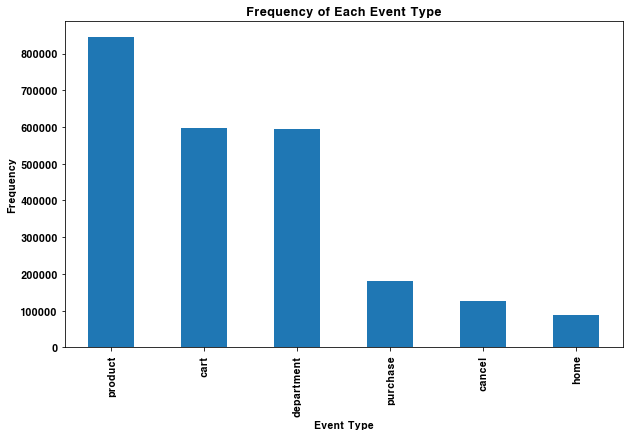

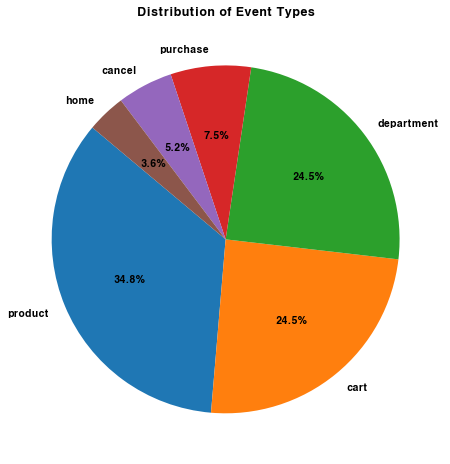

In [77]:
# 각 이벤트 유형의 빈도수 확인
event_type_counts = df_events['event_type'].value_counts()

# 이벤트 유형별로 시각화
plt.figure(figsize=(10, 6))
event_type_counts.plot(kind='bar')
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.title('Frequency of Each Event Type')
plt.show()

# 이벤트 유형별로 시각화 (원 그래프)
plt.figure(figsize=(8, 8))
plt.pie(event_type_counts, labels=event_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Event Types')
plt.show()

### session duration

In [78]:
# 'created_at' 열을 datetime 형식으로 변환 (ISO8601 형식 사용)
df_events['created_at'] = pd.to_datetime(df_events['created_at'], format='ISO8601')

In [79]:
# 세션 아이디별로 세션의 시작 시간과 종료 시간 계산
session_start_times = df_events.groupby('session_id')['created_at'].min()
session_end_times = df_events.groupby('session_id')['created_at'].max()

# 세션의 지속 시간 계산 (종료 시간 - 시작 시간)
session_durations = session_end_times - session_start_times

# 세션 지속 시간의 평균, 중앙값, 최대값, 최소값 등 확인
session_duration_stats = session_durations.describe()

# 결과 출력
print("Session Duration Statistics:")
print(session_duration_stats)

Session Duration Statistics:
count                       681759
mean     0 days 06:53:23.765951017
std      0 days 20:47:05.282373797
min                0 days 00:00:00
25%                0 days 00:04:40
50%                0 days 00:17:00
75%                0 days 00:33:00
max                4 days 00:28:43
Name: created_at, dtype: object


### 세션별로 활동 패턴 시각화
   - 세션별로 발생한 이벤트의 시간 분포를 시각화하여 세션 내에서의 활동 패턴을 확인합니다.

In [80]:
# session_grouped = df_events.groupby('session_id')['created_at'].apply(list)
# session_grouped

In [81]:
# # 세션별로 활동 패턴을 시각화합니다.
# plt.figure(figsize=(10, 6))
# for session_id, event_times in session_grouped.items():
#     plt.hist(event_times, bins=24, alpha=0.5, label=f"Session {session_id}")

# plt.title('Activity Patterns by Session')
# plt.xlabel('Hour of the Day')
# plt.ylabel('Event Count')
# plt.legend()
# plt.show()

### 상관관계

#### state
- browser
- traffic_source
- event_type

In [89]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# 크래머의 V 함수 정의
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# 카이제곱 검정과 크래머의 V 계산하는 함수 정의
def chi2_and_cramers_v(df, col1, col2):
    # 데이터프레임에서 필요한 열만 선택
    df_selected = df[[col1, col2]]

    # 교차 테이블 생성
    cross_tab = pd.crosstab(df_selected[col1], df_selected[col2])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # 크래머의 V 계산
    cramers_v_score = cramers_v(df_selected[col1], df_selected[col2])

    # 결과 출력
    print(f"카이제곱 검정 결과 ({col1} vs {col2}):")
    print("Chi-square 값:", chi2)
    print("P-value:", round(p, 4))
    print("자유도:", dof)
    print("Expected frequencies:\n", expected)
    print(f"Cramér's V ({col1} vs {col2}):", round(cramers_v_score, 4))
    print("\n")

# state와 다른 열들 간의 카이제곱 검정과 크래머의 V 계산 수행
chi2_and_cramers_v(df_events, 'state', 'browser')
chi2_and_cramers_v(df_events, 'state', 'traffic_source')
chi2_and_cramers_v(df_events, 'state', 'event_type')

카이제곱 검정 결과 (state vs browser):
Chi-square 값: 5402.9608988963155
P-value: 0.0
자유도: 920
Expected frequencies:
 [[4.70544615e+02 1.88223715e+02 4.69317950e+01 4.65229068e+01
  1.86776969e+02]
 [6.72994055e+02 2.69206016e+02 6.71239624e+01 6.65391521e+01
  2.67136815e+02]
 [4.05901105e+01 1.62365505e+01 4.04842960e+00 4.01315809e+00
  1.61117513e+01]
 ...
 [2.49554013e+02 9.98247177e+01 2.48903450e+01 2.46734905e+01
  9.90574339e+01]
 [2.67032816e+04 1.06816457e+04 2.66336687e+03 2.64016257e+03
  1.05995432e+04]
 [1.51711802e+04 6.06866130e+03 1.51316304e+03 1.49997977e+03
  6.02201568e+03]]
Cramér's V (state vs browser): 0.0215


카이제곱 검정 결과 (state vs traffic_source):
Chi-square 값: 5138.749663796641
P-value: 0.0
자유도: 920
Expected frequencies:
 [[2.82300436e+02 4.21625137e+02 9.41462210e+01 4.71279378e+01
  9.38002683e+01]
 [4.03758771e+02 6.03027219e+02 1.34652156e+02 6.74044946e+01
  1.34157359e+02]
 [2.43517948e+01 3.63702194e+01 8.12123951e+00 4.06534927e+00
  8.09139695e+00]
 ...
 [1.4

#### city
- browser
- traffic_source
- event_type

In [87]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# 크래머의 V 함수 정의
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# 카이제곱 검정과 크래머의 V 계산하는 함수 정의
def chi2_and_cramers_v(df, col1, col2):
    # 데이터프레임에서 필요한 열만 선택
    df_selected = df[[col1, col2]]

    # 교차 테이블 생성
    cross_tab = pd.crosstab(df_selected[col1], df_selected[col2])

    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(cross_tab)

    # 크래머의 V 계산
    cramers_v_score = cramers_v(df_selected[col1], df_selected[col2])

    # 결과 출력
    print(f"카이제곱 검정 결과 ({col1} vs {col2}):")
    print("Chi-square 값:", chi2)
    print("P-value:", round(p, 4))
    print("자유도:", dof)
    print("Expected frequencies:\n", expected)
    print(f"Cramér's V ({col1} vs {col2}):", round(cramers_v_score, 4))
    print("\n")

# city와 다른 열들 간의 카이제곱 검정과 크래머의 V 계산 수행
chi2_and_cramers_v(df_events, 'city', 'browser')
chi2_and_cramers_v(df_events, 'city', 'traffic_source')
chi2_and_cramers_v(df_events, 'city', 'event_type')

카이제곱 검정 결과 (city vs browser):
Chi-square 값: 167650.9738225285
P-value: 0.0
자유도: 35096
Expected frequencies:
 [[ 14.03131991   5.6109425    1.40073055   1.38713088   5.56987616]
 [203.4541387   81.35866624  20.31059292  20.11339779  80.76320436]
 [114.25503356  45.68910321  11.40594873  11.29520861  45.35470589]
 ...
 [ 93.20805369  37.27268946   9.30485291   9.21451229  36.99989165]
 [  9.5212528    3.80742527   0.95049573   0.94126738   3.77955882]
 [ 34.57718121  13.82696544   3.45180027   3.41828682  13.72576626]]
Cramér's V (city vs browser): 0.1173


카이제곱 검정 결과 (city vs traffic_source):
Chi-square 값: 170025.08043872906
P-value: 0.0
자유도: 35096
Expected frequencies:
 [[  8.41198514  12.57772503   2.80738915   1.40456635   2.79833433]
 [121.97378453 182.37701291  40.70714269  20.36621206  40.57584781]
 [ 68.49759328 102.41861809  22.8601688   11.43718313  22.7864367 ]
 ...
 [ 55.87961557  83.55203055  18.64908507   9.3303336   18.5889352 ]
 [  5.70813277   8.53488484   1.90501407   0

#### browser

In [90]:
df_events

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2198523,NaN,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
1,1773216,NaN,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel
2,2380515,NaN,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel
3,2250597,NaN,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel
4,1834446,NaN,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431958,822590,62906.0,5,12ae51e7-76b3-4560-9335-3ea762eae60e,2022-04-07 01:55:02+00:00,52.92.60.25,St Helens,England,WA9,Firefox,Adwords,/purchase,purchase
2431959,43178,3333.0,5,e472549e-273e-402e-ae5f-38ece25699c2,2023-09-26 10:25:28+00:00,97.78.106.249,Orrell,England,WN5,IE,Email,/purchase,purchase
2431960,553230,42386.0,10,6a7ba027-2af2-46a3-ae05-294a264840cf,2023-07-31 15:11:10+00:00,147.252.137.75,Orrell,England,WN5,Chrome,Facebook,/purchase,purchase
2431961,1015190,77546.0,5,29e5960c-214b-456e-8c38-fe6eb8ff1ec8,2024-01-02 14:26:38+00:00,112.209.120.82,Wolverhampton,England,WV6,Chrome,Adwords,/purchase,purchase


In [91]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431963 entries, 0 to 2431962
Data columns (total 13 columns):
 #   Column           Dtype              
---  ------           -----              
 0   id               int64              
 1   user_id          float64            
 2   sequence_number  int64              
 3   session_id       object             
 4   created_at       datetime64[ns, UTC]
 5   ip_address       object             
 6   city             object             
 7   state            object             
 8   postal_code      object             
 9   browser          object             
 10  traffic_source   object             
 11  uri              object             
 12  event_type       object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(9)
memory usage: 241.2+ MB


In [92]:
df_events['browser']

0           Chrome
1           Safari
2               IE
3           Chrome
4           Chrome
            ...   
2431958    Firefox
2431959         IE
2431960     Chrome
2431961     Chrome
2431962    Firefox
Name: browser, Length: 2431963, dtype: object

In [93]:
df_events['event_type']

0            cancel
1            cancel
2            cancel
3            cancel
4            cancel
             ...   
2431958    purchase
2431959    purchase
2431960    purchase
2431961    purchase
2431962    purchase
Name: event_type, Length: 2431963, dtype: object

#### traffic_source
- browser

## 세션별 데이터 분석
- session_id
- created_at, uri

In [94]:
df_events['session_id']

0          83889ed2-2adc-4b9a-af5d-154f6998e778
1          7a3fc3f2-e84f-44fe-8876-eff76741f7a3
2          13d9b2fb-eee1-43fd-965c-267b38dd7125
3          96f1d44e-9621-463c-954c-d8deb7fffe7f
4          d09dce10-a7cb-47d3-a9af-44975566fa03
                           ...                 
2431958    12ae51e7-76b3-4560-9335-3ea762eae60e
2431959    e472549e-273e-402e-ae5f-38ece25699c2
2431960    6a7ba027-2af2-46a3-ae05-294a264840cf
2431961    29e5960c-214b-456e-8c38-fe6eb8ff1ec8
2431962    9f633088-d2a8-4db2-8a5e-ebd946abce26
Name: session_id, Length: 2431963, dtype: object

In [95]:
df_events['session_id'].value_counts().head(10)

session_id
b174d8d5-a07f-44c1-a1c2-226f495b4cf4    13
b8872abf-7c4a-4afc-ac54-c61ae7f7249a    13
ee9acceb-18ca-4588-a25f-c980f5f3622f    13
6ae3a11d-7927-4877-8a62-21693e6a68be    13
c61b8349-fb9d-4e1b-9dc2-638409fcad20    13
b12da1d4-808b-4213-8c5a-8212a1b528ae    13
995ba6a0-18dd-43ab-b4e5-8c286bd7cf18    13
acef5dce-3c5f-47ad-8c8a-58d3a71e5e89    13
9450d1a4-a431-4898-a3c1-38af4f2258b6    13
89c7f90b-0a8b-4ec9-8f6a-d77cc9e1afa7    13
Name: count, dtype: int64

In [96]:
print(df_events[df_events['session_id'] =='83889ed2-2adc-4b9a-af5d-154f6998e778'])

              id  user_id  sequence_number  \
0        2198523      NaN                3   
1380245  2198521      NaN                1   
2259680  2198522      NaN                2   

                                   session_id                created_at  \
0        83889ed2-2adc-4b9a-af5d-154f6998e778 2021-06-17 17:30:00+00:00   
1380245  83889ed2-2adc-4b9a-af5d-154f6998e778 2021-06-17 17:10:00+00:00   
2259680  83889ed2-2adc-4b9a-af5d-154f6998e778 2021-06-17 17:24:00+00:00   

            ip_address       city      state postal_code browser  \
0        138.143.9.202  São Paulo  São Paulo   02675-031  Chrome   
1380245  138.143.9.202  São Paulo  São Paulo   02675-031  Chrome   
2259680  138.143.9.202  São Paulo  São Paulo   02675-031  Chrome   

        traffic_source             uri event_type  
0              Adwords         /cancel     cancel  
1380245        Adwords  /product/16375    product  
2259680        Adwords           /cart       cart  


### 세션 아이디 유니크

In [97]:
df_events['session_id'].value_counts().unique()

array([13, 10,  7,  5,  3,  2,  1], dtype=int64)

### 세션별 이슈
- 마지막 시퀀스의 생성일이 다르다!

마지막 시퀀스 번호의 생성일을 바꿔야 하는데 제각기다.  

제각기 상황의 의미: 어떤거는 이전일과 같고, 어떤거는 이전일과 다르다. 

각 세션의 이전과 마지막 생성일만 뽑아서 비교해보고,  
전처리를 수행해보는 방법을 생각해봤다.


In [98]:
# 시퀀스 번호가 13개인 세션 아이디 10개 추출
session_ids_with_13_sequences = df_events['session_id'].value_counts()[df_events['session_id'].value_counts() == 13].head(10).index

# 각 세션 아이디별로 데이터 출력
for session_id in session_ids_with_13_sequences:
    session_data = df_events[df_events['session_id'] == session_id].sort_values('sequence_number')
    print(f"Session ID: {session_id} \n")
    print(session_data, "\n")

Session ID: b174d8d5-a07f-44c1-a1c2-226f495b4cf4 

             id  user_id  sequence_number  \
380190   428793  32888.0                1   
238179   428794  32888.0                2   
424067   428795  32888.0                3   
1026875  428796  32888.0                4   
1629393  428797  32888.0                5   
896656   428798  32888.0                6   
1969390  428799  32888.0                7   
2199644  428800  32888.0                8   
548356   428801  32888.0                9   
1299552  428802  32888.0               10   
2199642  428803  32888.0               11   
1070326  428804  32888.0               12   
1512796  428805  32888.0               13   

                                   session_id                created_at  \
380190   b174d8d5-a07f-44c1-a1c2-226f495b4cf4 2023-03-04 01:20:10+00:00   
238179   b174d8d5-a07f-44c1-a1c2-226f495b4cf4 2023-03-04 01:22:28+00:00   
424067   b174d8d5-a07f-44c1-a1c2-226f495b4cf4 2023-03-04 01:24:03+00:00   
1026875  b174d8d5-

Session ID: b12da1d4-808b-4213-8c5a-8212a1b528ae 

             id  user_id  sequence_number  \
731530   472838  36169.0                1   
2179259  472839  36169.0                2   
1420656  472840  36169.0                3   
2368812  472841  36169.0                4   
1063356  472842  36169.0                5   
2337934  472843  36169.0                6   
2046997  472844  36169.0                7   
1261695  472845  36169.0                8   
1395856  472846  36169.0                9   
1203095  472847  36169.0               10   
665616   472848  36169.0               11   
1395855  472849  36169.0               12   
1265920  472850  36169.0               13   

                                   session_id                created_at  \
731530   b12da1d4-808b-4213-8c5a-8212a1b528ae 2023-07-16 06:07:32+00:00   
2179259  b12da1d4-808b-4213-8c5a-8212a1b528ae 2023-07-16 06:08:22+00:00   
1420656  b12da1d4-808b-4213-8c5a-8212a1b528ae 2023-07-16 06:10:42+00:00   
2368812  b12da1d4-

Session ID: 89c7f90b-0a8b-4ec9-8f6a-d77cc9e1afa7 

             id  user_id  sequence_number  \
557896   215617  16592.0                1   
716049   215618  16592.0                2   
2041523  215619  16592.0                3   
1799402  215620  16592.0                4   
1931831  215621  16592.0                5   
502155   215622  16592.0                6   
806689   215623  16592.0                7   
317961   215624  16592.0                8   
1818191  215625  16592.0                9   
1650321  215626  16592.0               10   
367838   215627  16592.0               11   
427654   215628  16592.0               12   
1812020  215629  16592.0               13   

                                   session_id                created_at  \
557896   89c7f90b-0a8b-4ec9-8f6a-d77cc9e1afa7 2020-11-17 07:30:54+00:00   
716049   89c7f90b-0a8b-4ec9-8f6a-d77cc9e1afa7 2020-11-17 07:31:33+00:00   
2041523  89c7f90b-0a8b-4ec9-8f6a-d77cc9e1afa7 2020-11-17 07:33:06+00:00   
1799402  89c7f90b-

In [100]:
print(session_data[['sequence_number','created_at']])

# 마지막 sequence_number 13의 created_at 의 day가 다르다

         sequence_number                created_at
557896                 1 2020-11-17 07:30:54+00:00
716049                 2 2020-11-17 07:31:33+00:00
2041523                3 2020-11-17 07:33:06+00:00
1799402                4 2020-11-17 07:35:06+00:00
1931831                5 2020-11-17 07:35:16+00:00
502155                 6 2020-11-17 07:37:54+00:00
806689                 7 2020-11-17 07:39:28+00:00
317961                 8 2020-11-17 07:40:33+00:00
1818191                9 2020-11-17 07:42:09+00:00
1650321               10 2020-11-17 07:43:53+00:00
367838                11 2020-11-17 07:46:11+00:00
427654                12 2020-11-17 07:47:10+00:00
1812020               13 2020-11-18 07:47:10+00:00


In [102]:
df_events[df_events['session_id'] =='9450d1a4-a431-4898-a3c1-38af4f2258b6'].sort_values('sequence_number')

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
210084,316844,24209.0,1,9450d1a4-a431-4898-a3c1-38af4f2258b6,2023-10-15 06:09:24+00:00,85.175.106.221,Brasília,Distrito Federal,70297-400,Chrome,Adwords,/department/women/category/active/brand/lifeis...,department
691422,316845,24209.0,2,9450d1a4-a431-4898-a3c1-38af4f2258b6,2023-10-15 06:11:55+00:00,85.175.106.221,Brasília,Distrito Federal,70297-400,Chrome,Adwords,/product/2694,product
2288992,316846,24209.0,3,9450d1a4-a431-4898-a3c1-38af4f2258b6,2023-10-15 06:14:40+00:00,85.175.106.221,Brasília,Distrito Federal,70297-400,Chrome,Adwords,/cart,cart
2121458,316847,24209.0,4,9450d1a4-a431-4898-a3c1-38af4f2258b6,2023-10-15 06:17:35+00:00,85.175.106.221,Brasília,Distrito Federal,70297-400,Chrome,Adwords,/department/women/category/active/brand/lifeis...,department
1584967,316848,24209.0,5,9450d1a4-a431-4898-a3c1-38af4f2258b6,2023-10-15 06:18:45+00:00,85.175.106.221,Brasília,Distrito Federal,70297-400,Chrome,Adwords,/product/2694,product
154737,316849,24209.0,6,9450d1a4-a431-4898-a3c1-38af4f2258b6,2023-10-15 06:20:02+00:00,85.175.106.221,Brasília,Distrito Federal,70297-400,Chrome,Adwords,/cart,cart
1154659,316850,24209.0,7,9450d1a4-a431-4898-a3c1-38af4f2258b6,2023-10-15 06:21:01+00:00,85.175.106.221,Brasília,Distrito Federal,70297-400,Chrome,Adwords,/department/women/category/active/brand/lifeis...,department
2427942,316851,24209.0,8,9450d1a4-a431-4898-a3c1-38af4f2258b6,2023-10-15 06:22:32+00:00,85.175.106.221,Brasília,Distrito Federal,70297-400,Chrome,Adwords,/product/2694,product
303014,316852,24209.0,9,9450d1a4-a431-4898-a3c1-38af4f2258b6,2023-10-15 06:22:59+00:00,85.175.106.221,Brasília,Distrito Federal,70297-400,Chrome,Adwords,/cart,cart
1377891,316853,24209.0,10,9450d1a4-a431-4898-a3c1-38af4f2258b6,2023-10-15 06:25:11+00:00,85.175.106.221,Brasília,Distrito Federal,70297-400,Chrome,Adwords,/department/women/category/active/brand/lifeis...,department


In [129]:
df_events['created_at']

0         2021-06-17 17:30:00+00:00
1         2020-08-07 08:41:00+00:00
2         2021-02-15 18:48:00+00:00
3         2022-03-30 10:56:00+00:00
4         2019-09-05 01:18:00+00:00
                     ...           
2431958   2022-04-07 01:55:02+00:00
2431959   2023-09-26 10:25:28+00:00
2431960   2023-07-31 15:11:10+00:00
2431961   2024-01-02 14:26:38+00:00
2431962   2022-09-15 09:55:32+00:00
Name: created_at, Length: 2431963, dtype: datetime64[ns, UTC]

### 세션별로 데이터를 그룹화
- 각 세션의 시작 시간과 종료 시간 확인
- 각 세션의 지속 시간 계산

In [ ]:
# 세션별로 데이터를 그룹화
session_groups = df_events.groupby('session_id')

In [ ]:
# 각 세션의 시작 시간과 종료 시간 확인
session_start_times = session_groups['created_at'].min()
session_start_times

In [ ]:
session_end_times = session_groups['created_at'].max()
session_end_times

In [185]:
# 각 세션의 지속 시간 계산
session_durations = session_end_times - session_start_times
session_durations

session_id
00000763-a855-4ad0-a95c-b160e749b272   0 days 00:26:00
0000364a-ce41-46f1-89d6-3f8704af77db   0 days 00:06:02
00004b15-f2d4-4687-b4c1-fc9ce336d39a   0 days 00:26:00
00004cf0-0d54-4347-8b0c-dccc700a2c96   0 days 00:21:00
00004e02-6372-47a6-aaf7-f231de654979   0 days 00:06:29
                                             ...      
ffff7645-26f7-410f-8498-0c601d74c67a   0 days 00:39:00
ffff8086-da2c-4045-94ba-453437cd3289   0 days 00:00:00
ffffa9aa-4345-4c2a-b389-8fd58844472e   0 days 00:04:00
ffffc3b7-9bc3-44d0-935e-cfaf11c91a0e   0 days 00:19:00
ffffc96a-b665-41a1-8a9a-1101c46e6620   2 days 00:13:11
Name: created_at, Length: 681759, dtype: timedelta64[ns]

### 각 세션의 페이지 조회 수 계산

In [134]:
# 각 세션의 페이지 조회 수 계산
session_page_views = session_groups['uri'].nunique()

In [135]:
session_page_views

session_id
00000763-a855-4ad0-a95c-b160e749b272    3
0000364a-ce41-46f1-89d6-3f8704af77db    5
00004b15-f2d4-4687-b4c1-fc9ce336d39a    3
00004cf0-0d54-4347-8b0c-dccc700a2c96    3
00004e02-6372-47a6-aaf7-f231de654979    5
                                       ..
ffff7645-26f7-410f-8498-0c601d74c67a    3
ffff8086-da2c-4045-94ba-453437cd3289    1
ffffa9aa-4345-4c2a-b389-8fd58844472e    2
ffffc3b7-9bc3-44d0-935e-cfaf11c91a0e    3
ffffc96a-b665-41a1-8a9a-1101c46e6620    4
Name: uri, Length: 681759, dtype: int64

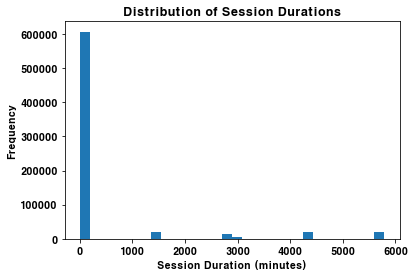

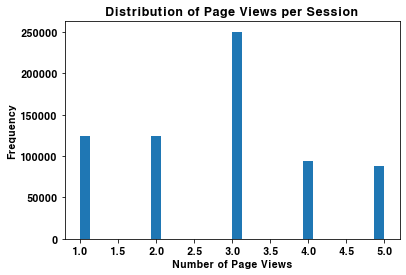

In [136]:
import matplotlib.pyplot as plt

# 각 세션의 지속 시간 분포 시각화
plt.hist(session_durations.dt.total_seconds() / 60, bins=30)
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Session Durations')
plt.show()

# 각 세션의 페이지 조회 수 분포 시각화
plt.hist(session_page_views, bins=30)
plt.xlabel('Number of Page Views')
plt.ylabel('Frequency')
plt.title('Distribution of Page Views per Session')
plt.show()

## Advertising Conversion Rates (전환율)
- 트래픽 소스별 전환율

In [160]:
df_events[['traffic_source','event_type']]

,traffic_source,event_type
0,Adwords,cancel
1,Adwords,cancel
2,Adwords,cancel
3,Adwords,cancel
4,Email,cancel
...,...,...
2431958,Adwords,purchase
2431959,Email,purchase
2431960,Facebook,purchase
2431961,Adwords,purchase


In [ ]:
df_events.groupby('traffic_source')['event_type'].count()

In [173]:
df_events.groupby(['traffic_source','event_type'])[['traffic_source','event_type']].count()

traffic_source  event_type
traffic_source event_type                            
Adwords        cancel               37795       37795
               cart                179281      179281
               department          178886      178886
               home                 26350       26350
               product             254290      254290
               purchase             54542       54542
Email          cancel               56170       56170
               cart                267411      267411
               department          267470      267470
               home                 39495       39495
               product             379736      379736
               purchase             81706       81706
Facebook       cancel               12669       12669
               cart                 59962       59962
               department           59581       59581
               home                  8794        8794
               product              84523       84523
               purchase             18305       18305
Organic        cancel                6284        6284
               cart                 29822       29822
               department           29930       29930
               home                  4379        4379
               product              42520       42520
               purchase              9124        9124
YouTube        cancel               12650       12650
               cart                 59518       59518
               department           59456       59456
               home                  8694        8694
               product              84538       84538
               purchase             18082       18082

In [159]:
df_events[['traffic_source','event_type']].groupby(['traffic_source', 'event_type']).size()

traffic_source  event_type
Adwords         cancel         37795
                cart          179281
                department    178886
                home           26350
                product       254290
                purchase       54542
Email           cancel         56170
                cart          267411
                department    267470
                home           39495
                product       379736
                purchase       81706
Facebook        cancel         12669
                cart           59962
                department     59581
                home            8794
                product        84523
                purchase       18305
Organic         cancel          6284
                cart           29822
                department     29930
                home            4379
                product        42520
                purchase        9124
YouTube         cancel         12650
                cart           59518
           

In [174]:
events_source = df_events[['traffic_source','event_type']]
events_source

,traffic_source,event_type
0,Adwords,cancel
1,Adwords,cancel
2,Adwords,cancel
3,Adwords,cancel
4,Email,cancel
...,...,...
2431958,Adwords,purchase
2431959,Email,purchase
2431960,Facebook,purchase
2431961,Adwords,purchase


In [175]:
events_source = events_source.groupby(['traffic_source', 'event_type']).size().reset_index(name='count')
events_source

,traffic_source,event_type,count
0,Adwords,cancel,37795
1,Adwords,cart,179281
2,Adwords,department,178886
3,Adwords,home,26350
4,Adwords,product,254290
5,Adwords,purchase,54542
6,Email,cancel,56170
7,Email,cart,267411
8,Email,department,267470
9,Email,home,39495


In [176]:
pivot_table = events_source.pivot_table(index='traffic_source', columns='event_type', values='count', fill_value=0)
pivot_table

event_type,cancel,cart,department,home,product,purchase
traffic_source,,,,,,
Adwords,37795.0,179281.0,178886.0,26350.0,254290.0,54542.0
Email,56170.0,267411.0,267470.0,39495.0,379736.0,81706.0
Facebook,12669.0,59962.0,59581.0,8794.0,84523.0,18305.0
Organic,6284.0,29822.0,29930.0,4379.0,42520.0,9124.0
YouTube,12650.0,59518.0,59456.0,8694.0,84538.0,18082.0


In [177]:
df_events.groupby(['traffic_source', 'event_type']).size().reset_index(name='count')

,traffic_source,event_type,count
0,Adwords,cancel,37795
1,Adwords,cart,179281
2,Adwords,department,178886
3,Adwords,home,26350
4,Adwords,product,254290
5,Adwords,purchase,54542
6,Email,cancel,56170
7,Email,cart,267411
8,Email,department,267470
9,Email,home,39495


In [178]:
pivot_table['total_events'] = pivot_table.sum(axis=1)
pivot_table['total_events']

traffic_source
Adwords      731144.0
Email       1091988.0
Facebook     243834.0
Organic      122059.0
YouTube      242938.0
Name: total_events, dtype: float64

In [179]:
pivot_table['conversion_rate'] = (pivot_table['purchase'] / pivot_table.drop('total_events', axis = 1).sum(axis=1)) * 100
pivot_table['conversion_rate']

traffic_source
Adwords     7.459816
Email       7.482317
Facebook    7.507157
Organic     7.475074
YouTube     7.443051
Name: conversion_rate, dtype: float64

In [180]:
pivot_table

event_type,cancel,cart,department,home,product,purchase,total_events,conversion_rate
traffic_source,,,,,,,,
Adwords,37795.0,179281.0,178886.0,26350.0,254290.0,54542.0,731144.0,7.459816
Email,56170.0,267411.0,267470.0,39495.0,379736.0,81706.0,1091988.0,7.482317
Facebook,12669.0,59962.0,59581.0,8794.0,84523.0,18305.0,243834.0,7.507157
Organic,6284.0,29822.0,29930.0,4379.0,42520.0,9124.0,122059.0,7.475074
YouTube,12650.0,59518.0,59456.0,8694.0,84538.0,18082.0,242938.0,7.443051


In [181]:
pivot_table = pivot_table.sort_values(by='conversion_rate', ascending=False).reset_index()
pivot_table

event_type,traffic_source,cancel,cart,department,home,product,purchase,total_events,conversion_rate
0,Facebook,12669.0,59962.0,59581.0,8794.0,84523.0,18305.0,243834.0,7.507157
1,Email,56170.0,267411.0,267470.0,39495.0,379736.0,81706.0,1091988.0,7.482317
2,Organic,6284.0,29822.0,29930.0,4379.0,42520.0,9124.0,122059.0,7.475074
3,Adwords,37795.0,179281.0,178886.0,26350.0,254290.0,54542.0,731144.0,7.459816
4,YouTube,12650.0,59518.0,59456.0,8694.0,84538.0,18082.0,242938.0,7.443051


In [184]:
print(pivot_table)

event_type traffic_source   cancel      cart  department     home   product  \
0                Facebook  12669.0   59962.0     59581.0   8794.0   84523.0   
1                   Email  56170.0  267411.0    267470.0  39495.0  379736.0   
2                 Organic   6284.0   29822.0     29930.0   4379.0   42520.0   
3                 Adwords  37795.0  179281.0    178886.0  26350.0  254290.0   
4                 YouTube  12650.0   59518.0     59456.0   8694.0   84538.0   

event_type  purchase  total_events  conversion_rate  
0            18305.0      243834.0         7.507157  
1            81706.0     1091988.0         7.482317  
2             9124.0      122059.0         7.475074  
3            54542.0      731144.0         7.459816  
4            18082.0      242938.0         7.443051  


In [183]:
pivot_table['conversion_rate']

0    7.507157
1    7.482317
2    7.475074
3    7.459816
4    7.443051
Name: conversion_rate, dtype: float64

In [182]:
fig = px.bar(pivot_table,
             x = 'traffic_source',
             y = 'purchase',
             color = 'traffic_source',
             text = [f'Conversion Rate: {rate:.2f}%' for rate in pivot_table['conversion_rate']],
             labels = dict(traffic_source= 'Traffic Source',
                           purchase= 'Total Purchase',
                          text= ''),
            height = 650)

fig.update_traces(textposition='outside')
fig.update_layout(title_text = 'Traffic Source Performance')

fig.show()